# MAG-exchange reactions clustermaps

In [1]:
import reframed
import pandas as pd
import numpy as np

from sklearn.metrics.pairwise import pairwise_distances
import scipy.spatial as sp
import scipy.cluster.hierarchy as hc
import seaborn as sns

import os
import json


import sys
sys.path.append("../functions/")

import colors_MAGs as color_func
import general_functions as general_func
import clustermap_functions as clustermap_func

In [2]:
%load_ext autoreload
%autoreload 2

### Functions

In [3]:
cazy_lut,unique_numbers,cazy_colors = color_func.cazy_colors_func()

phyla_lut, unique_phyla, phylum_colors = color_func.phylum_colors_func()

### Load data

In [4]:
all_mags_paper = general_func.read_allmags_data()

### Load models

In [5]:
directory = os.fsencode("../output/GEMs/GEMs_final/")

GEMs_dict = {}

for file in os.listdir(directory):
    filename = os.fsdecode(file)
    print(filename)

    GEMs_dict[filename[:-4]]= reframed.load_cbmodel("../output/GEMs/GEMs_final/"+filename)



CH7-bin.18.xml
CH15-bin.7.xml
CH13-bin.0.xml
CH1-bin.4.xml
CH13-bin.1.xml
CH13-bin.11.xml
CH15-bin.6.xml
CH7-bin.2.xml
CH13-bin.13.xml
CH1-bin.10.xml
CH1-bin.6.xml
CH13-bin.2.xml
CH13-bin.12.xml
CH15-bin.5.xml
CH7-bin.1.xml
CH15-bin.1.xml
CH1-bin.3.xml
CH13-bin.17.xml
CH15-bin.0.xml
CH7-bin.4.xml
CH7-bin.23.xml
CH7-bin.6.xml
CH15-bin.22.xml
CH15-bin.2.xml
CH1-bin.1.xml
CH13-bin.4.xml
CH13-bin.14.xml
CH15-bin.23.xml
CH7-bin.20.xml
CH8-bin.8.xml
CH8-bin.9.xml
CH8-bin.25.xml
CH14-bin.4.xml
CH14-bin.1.xml
CH8-bin.21.xml
CH14-bin.2.xml
CH8-bin.22.xml
CH8-bin.2.xml
CH8-bin.29.xml
CH8-bin.7.xml
CH8-bin.6.xml
CH3-bin.2.xml
CH8-bin.14.xml
CH8-bin.16.xml
CH3-bin.0.xml
CH8-bin.5.xml
CH3-bin.1.xml
CH8-bin.17.xml
CH7-bin.11.xml
CH9-bin.1.xml
CH15-bin.12.xml
CH13-bin.25.xml
CH15-bin.13.xml
CH9-bin.0.xml
CH7-bin.12.xml
CH9-bin.2.xml
CH7-bin.9.xml
CH15-bin.10.xml
CH7-bin.8.xml
CH7-bin.13.xml
CH7-bin.17.xml
CH15-bin.8.xml
CH15-bin.15.xml
CH7-bin.16.xml
CH9-bin.6.xml
CH9-bin.4.xml
CH15-bin.17.xml
CH1-bi

### Set colors

**READ COLORS FROM FUNCTIONS**

In [6]:
chebi_lut,chebi_interesting,chebi_colors_ser = color_func.chebi_rxn_color_func()

**Combine phylum and CAZy enzymes**

In [ ]:
colrs_df = pd.concat([cazy_colors,phylum_colors],axis=1)


In [ ]:
colrs_df

[autoreload of _distutils_hack failed: Traceback (most recent call last):
  File "/Users/idunmariaburgos/opt/anaconda3/envs/MAGs_RecAndAn2/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 276, in check
    superreload(m, reload, self.old_objects)
  File "/Users/idunmariaburgos/opt/anaconda3/envs/MAGs_RecAndAn2/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 475, in superreload
    module = reload(module)
  File "/Users/idunmariaburgos/opt/anaconda3/envs/MAGs_RecAndAn2/lib/python3.9/importlib/__init__.py", line 166, in reload
    spec = module.__spec__ = _bootstrap._find_spec(name, pkgpath, target)
  File "<frozen importlib._bootstrap>", line 925, in _find_spec
  File "/Users/idunmariaburgos/opt/anaconda3/envs/MAGs_RecAndAn2/lib/python3.9/site-packages/_distutils_hack/__init__.py", line 95, in find_spec
    def __init__(self, *patterns):
NameError: name 'locals' is not defined
]
[autoreload of traitlets.traitlets failed: Traceback (most recent call

## MAGs-to-Exchange reactions clustermap

In [8]:
df_copy,jaccard_mags,jaccard_rxns,linkage_row,linkage_col = clustermap_func.MAG_rxn_clustermap_data(GEMs_dict)

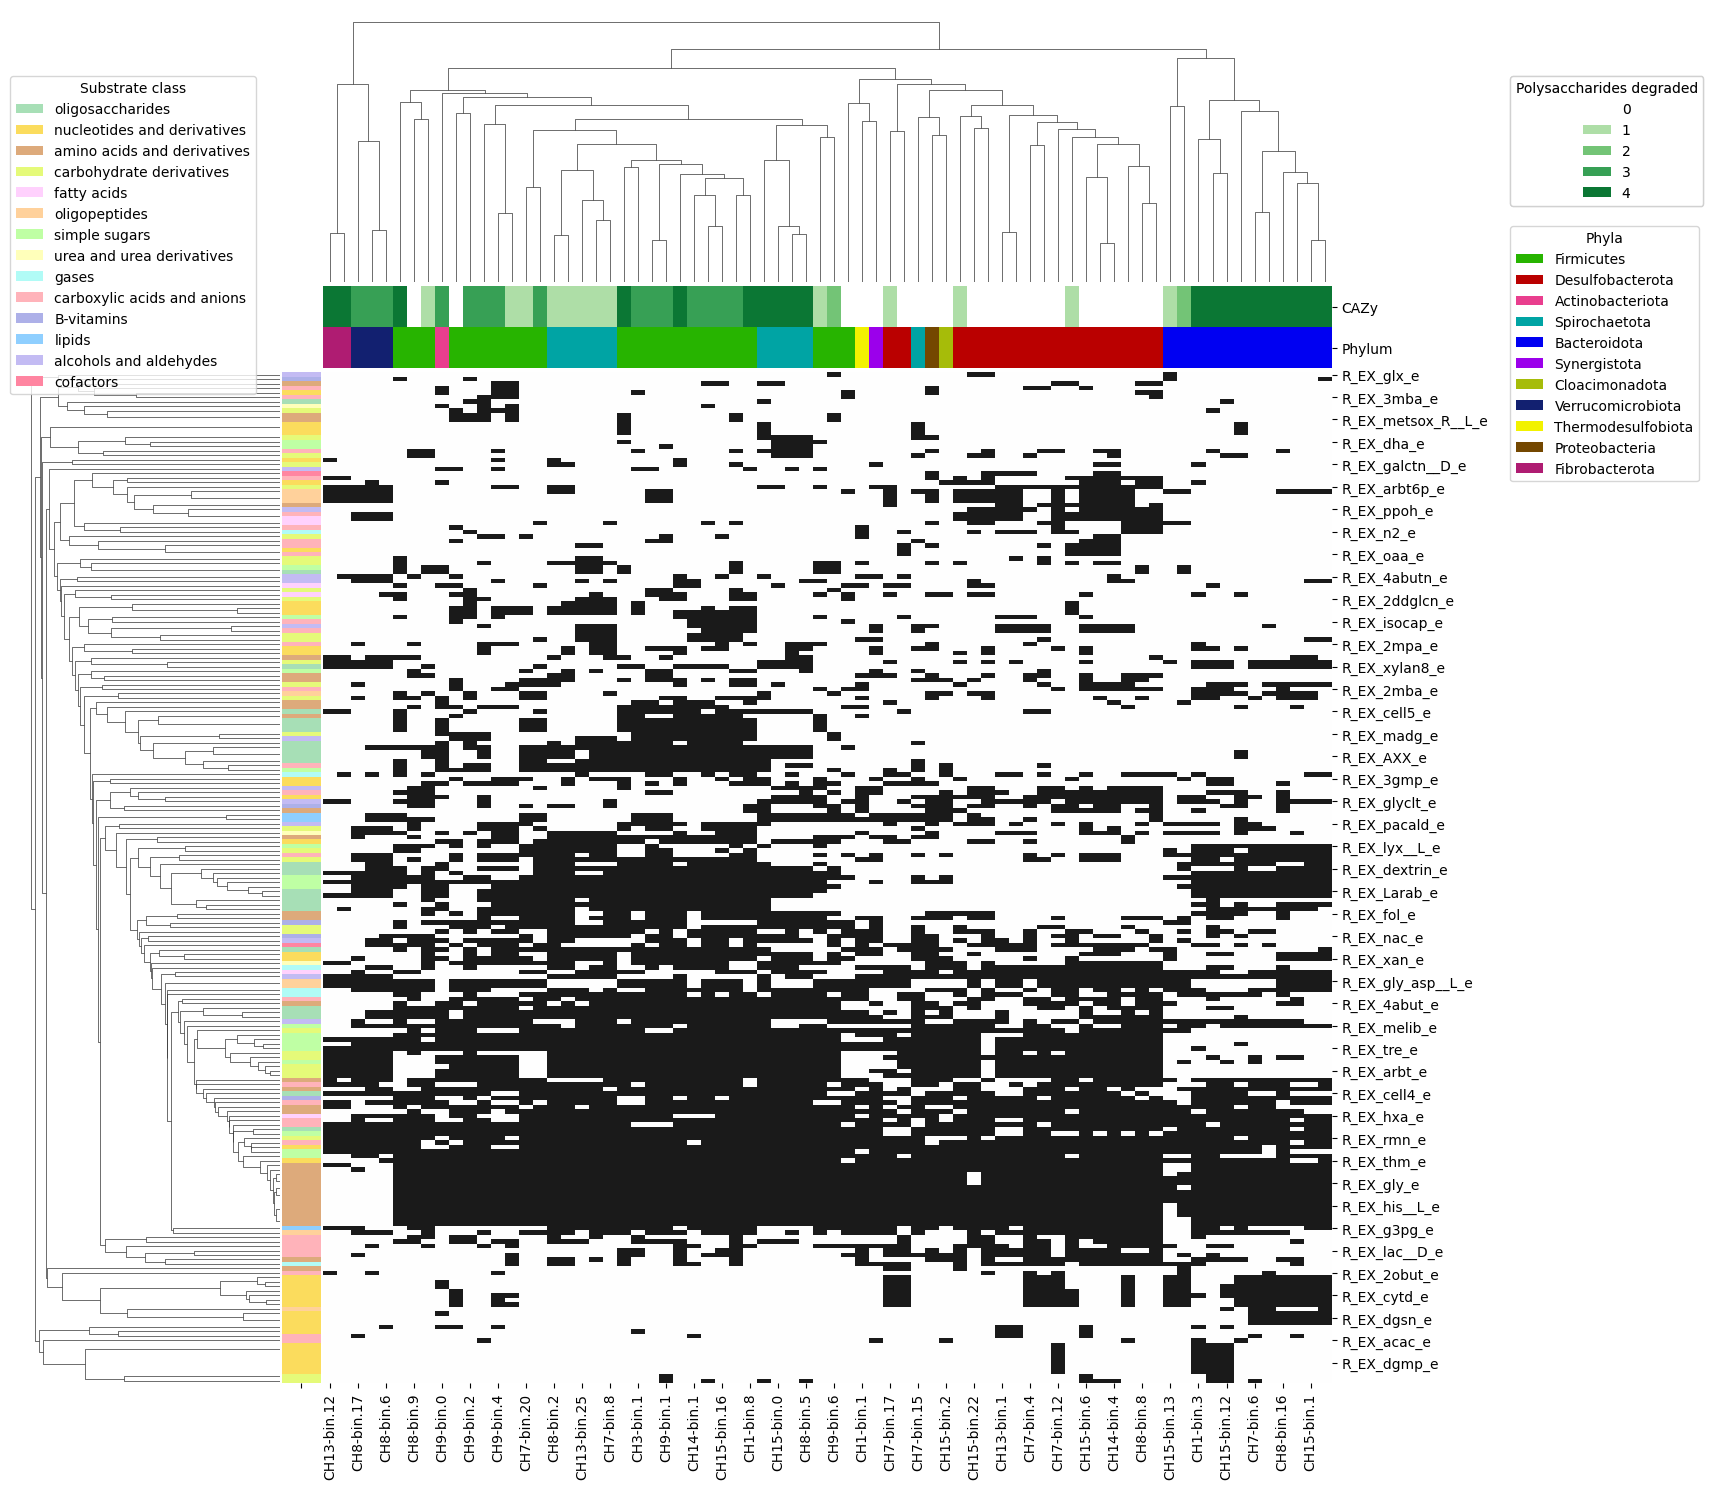

In [9]:
interesting_super_classes=chebi_interesting["self defined super class"].unique()

from matplotlib.pyplot import gcf

import matplotlib.pyplot as plt 

g = sns.clustermap(data=df_copy,center=0,
                   col_colors=colrs_df,row_colors=chebi_colors_ser,row_linkage=linkage_row,col_linkage=linkage_col,cmap="RdGy" ,cbar_pos=None,
                   figsize=(15, 15))

for label in unique_phyla:
    g.ax_col_dendrogram.bar(0, 0, color=phyla_lut[label], label=label, linewidth=0)


l1 = g.ax_col_dendrogram.legend(title='Phyla',ncol=1, bbox_to_anchor=(1.0, 0.85), loc='upper left',bbox_transform=gcf().transFigure)



for label in interesting_super_classes:
    g.ax_row_dendrogram.bar(0, 0, color=chebi_lut[label], label=label, linewidth=0)

l2 = g.ax_row_dendrogram.legend(title='Substrate class', loc="upper left", ncol=1, bbox_to_anchor=(0.0, 0.95), bbox_transform=gcf().transFigure)


# create a list for the bar plot patches
xx = []
for label in unique_numbers:
    x = g.ax_row_dendrogram.bar(0, 0, color=cazy_lut[label], label=label, linewidth=0)
    xx.append(x)

# add the legend
legend3 = plt.legend(xx, unique_numbers, loc="upper left", title='Polysaccharides degraded', bbox_to_anchor=(1.0, 0.95), bbox_transform=gcf().transFigure)

plt.gca().add_artist(legend3)
#plt.savefig("clustermap_MAG_exchanges.png",bbox_inches='tight')

plt.show()

## Compare with simulations


- Strategy

In [10]:
GEMs_consumers_df,GEMs_producers_df= clustermap_func.producers_consumers_sim(GEMs_dict=GEMs_dict)

Set parameter Username
Academic license - for non-commercial use only - expires 2025-03-14
CH7-bin.18
CH15-bin.7
CH13-bin.0
CH1-bin.4
CH13-bin.1
CH13-bin.11
CH15-bin.6
CH7-bin.2
CH13-bin.13
CH1-bin.10
CH1-bin.6
CH13-bin.2
CH13-bin.12
CH15-bin.5
CH7-bin.1
CH15-bin.1
CH1-bin.3
CH13-bin.17
CH15-bin.0
CH7-bin.4
CH7-bin.23
CH7-bin.6
CH15-bin.22
CH15-bin.2
CH1-bin.1
CH13-bin.4
CH13-bin.14
CH15-bin.23
CH7-bin.20
CH8-bin.8
CH8-bin.9
CH8-bin.25
CH14-bin.4
CH14-bin.1
CH8-bin.21
CH14-bin.2
CH8-bin.22
CH8-bin.2
CH8-bin.29
CH8-bin.7
CH8-bin.6
CH3-bin.2
CH8-bin.14
CH8-bin.16
CH3-bin.0
CH8-bin.5
CH3-bin.1
CH8-bin.17
CH7-bin.11
CH9-bin.1
CH15-bin.12
CH13-bin.25
CH15-bin.13
CH9-bin.0
CH7-bin.12
CH9-bin.2
CH7-bin.9
CH15-bin.10
CH7-bin.8
CH7-bin.13
CH7-bin.17
CH15-bin.8
CH15-bin.15
CH7-bin.16
CH9-bin.6
CH9-bin.4
CH15-bin.17
CH1-bin.8
CH1-bin.9
CH15-bin.16
CH7-bin.15
CH9-bin.5


In [11]:
from matplotlib.pyplot import gcf
import matplotlib.pyplot as plt 

def plot_clustermap(GEMS_df,interesting_super_classes=False,fig_title=False):


    chebi_lut,chebi_interesting,chebi_colors_ser = color_func.chebi_rxn_color_func(selected_super_classes=interesting_super_classes)

    GEMs_df_copy = clustermap_func.MAGs_rxns_data_processing_sim(GEMS_df,interesting_super_classes=interesting_super_classes)
    
    
    diff_df = GEMs_df_copy.max(axis=1)-GEMs_df_copy.min(axis=1)
    
    GEMs_df_copy = GEMs_df_copy.loc[~GEMs_df_copy.index.isin(diff_df[diff_df==0].index),:]
    

    interesting_super_classes=chebi_interesting["self defined super class"].unique()

    g = sns.clustermap(data=GEMs_df_copy,
                       method="ward",
                       metric="euclidean",
                       standard_scale=1,
                       center=0,
                       col_colors=colrs_df,
                       row_colors=chebi_colors_ser,
                       cmap="RdGy",
                       #vmin=0, 
                       #vmax=5,
                       cbar_pos=(0, .2, .03, .1),
                       figsize=(15, 15))


    for label in unique_phyla:
        g.ax_col_dendrogram.bar(0, 0, color=phyla_lut[label], label=label, linewidth=0)


    l1 = g.ax_col_dendrogram.legend(title='Phyla',ncol=1, bbox_to_anchor=(1.0, 0.85), loc='upper left',bbox_transform=gcf().transFigure)



    for label in interesting_super_classes:
        g.ax_row_dendrogram.bar(0, 0, color=chebi_lut[label], label=label, linewidth=0)

    l2 = g.ax_row_dendrogram.legend(title='Substrate class', loc="upper left", ncol=1, bbox_to_anchor=(0.0, 0.95), bbox_transform=gcf().transFigure)


    # create a list for the bar plot patches
    xx = []
    for label in unique_numbers:
        x = g.ax_row_dendrogram.bar(0, 0, color=cazy_lut[label], label=label, linewidth=0)
        xx.append(x)

    # add the legend
    legend3 = plt.legend(xx, unique_numbers, loc="upper left", title='Polysaccharides degraded', bbox_to_anchor=(1.0, 0.95), bbox_transform=gcf().transFigure)

    plt.gca().add_artist(legend3)
    if fig_title:
        plt.savefig(fig_title,bbox_inches='tight')
    plt.show()
    

## Consumers

/Users/idunmariaburgos/opt/anaconda3/envs/MAGs_RecAndAn2/lib/python3.9/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/Users/idunmariaburgos/opt/anaconda3/envs/MAGs_RecAndAn2/lib/python3.9/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


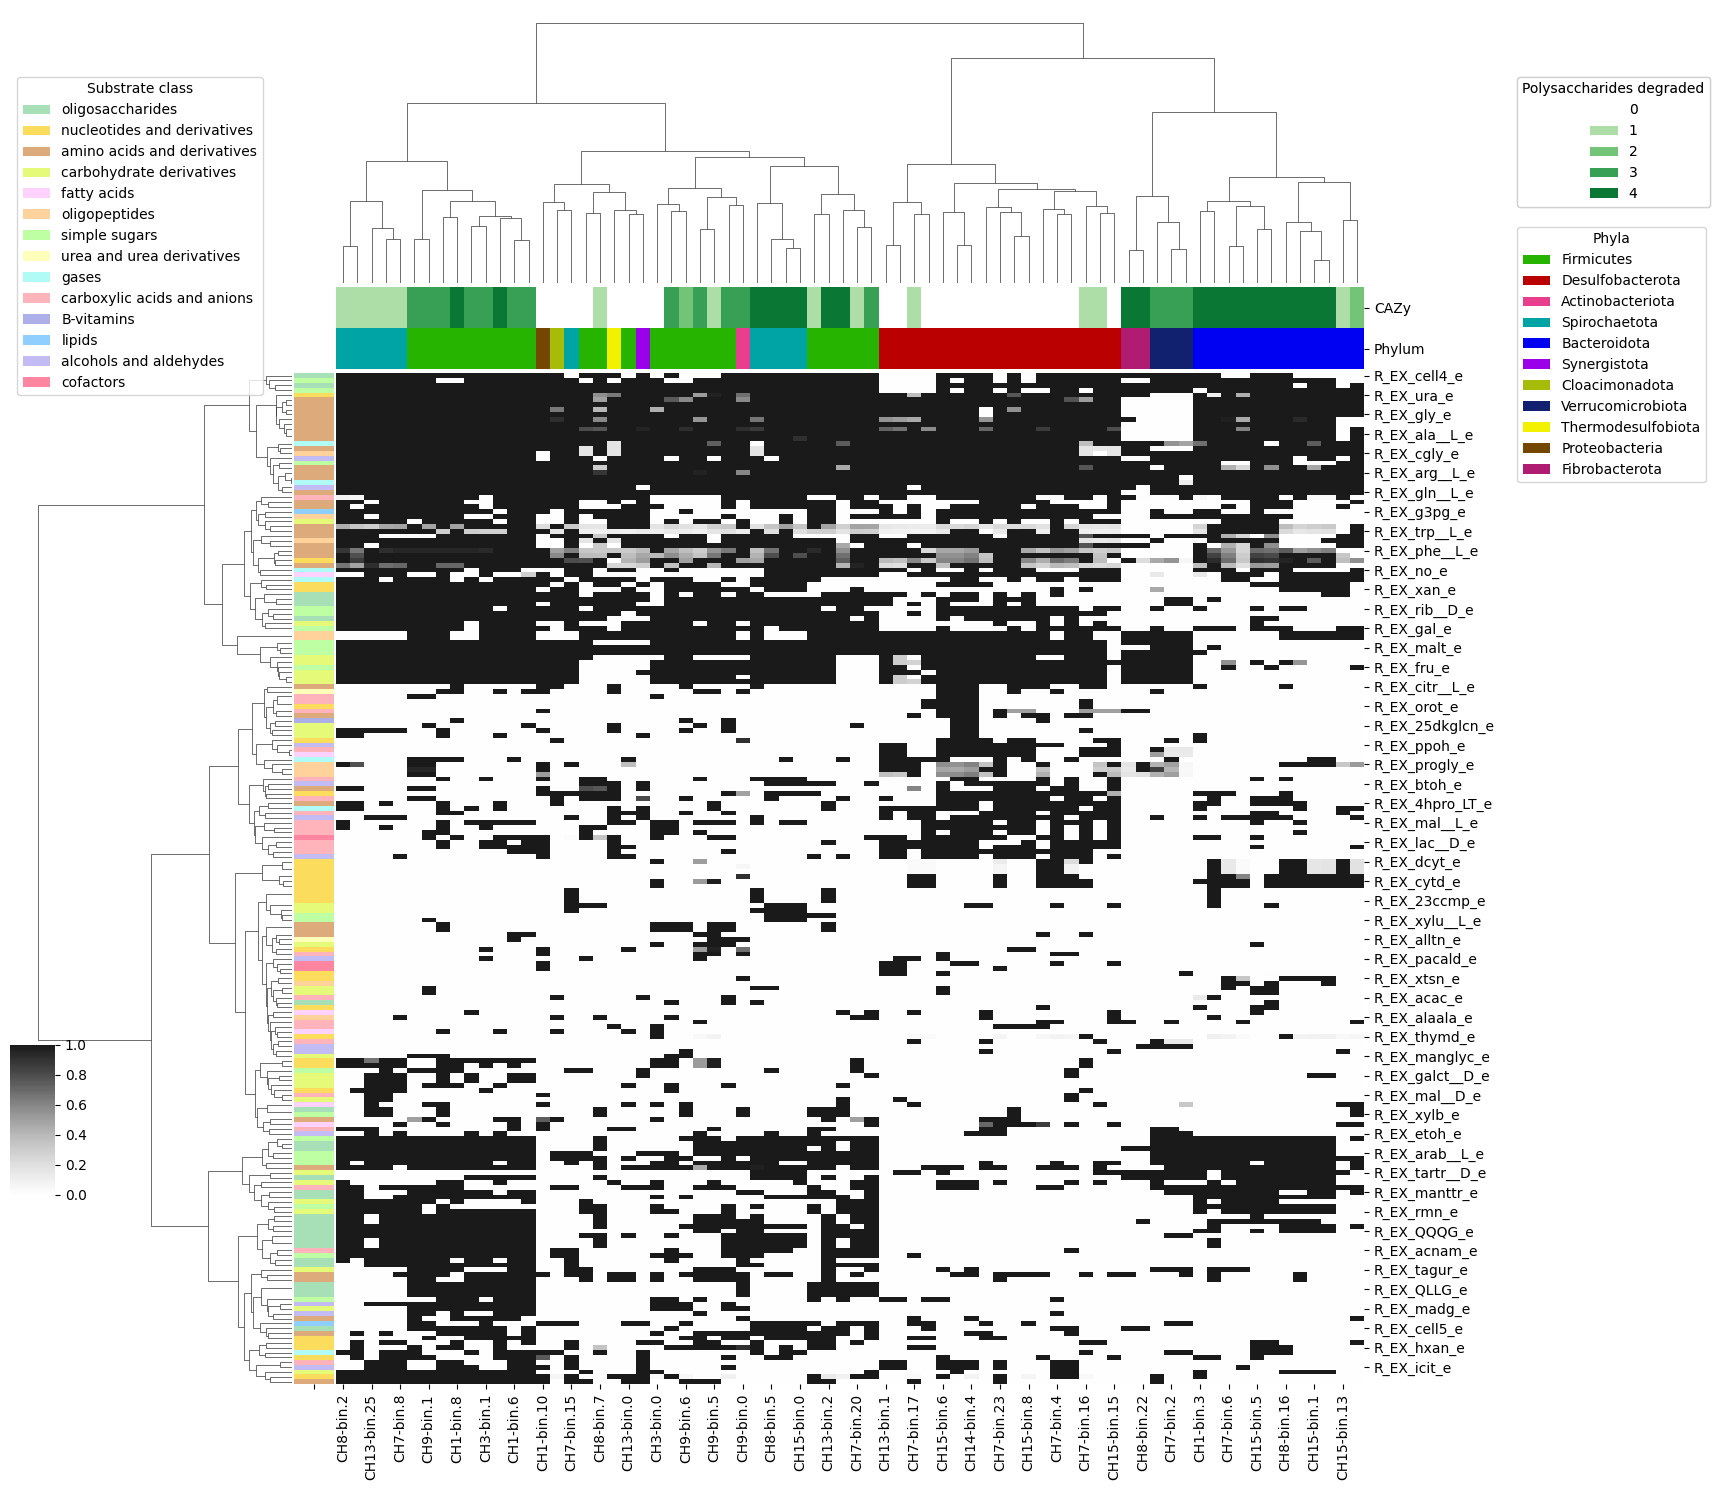

In [12]:
plot_clustermap(GEMs_consumers_df)

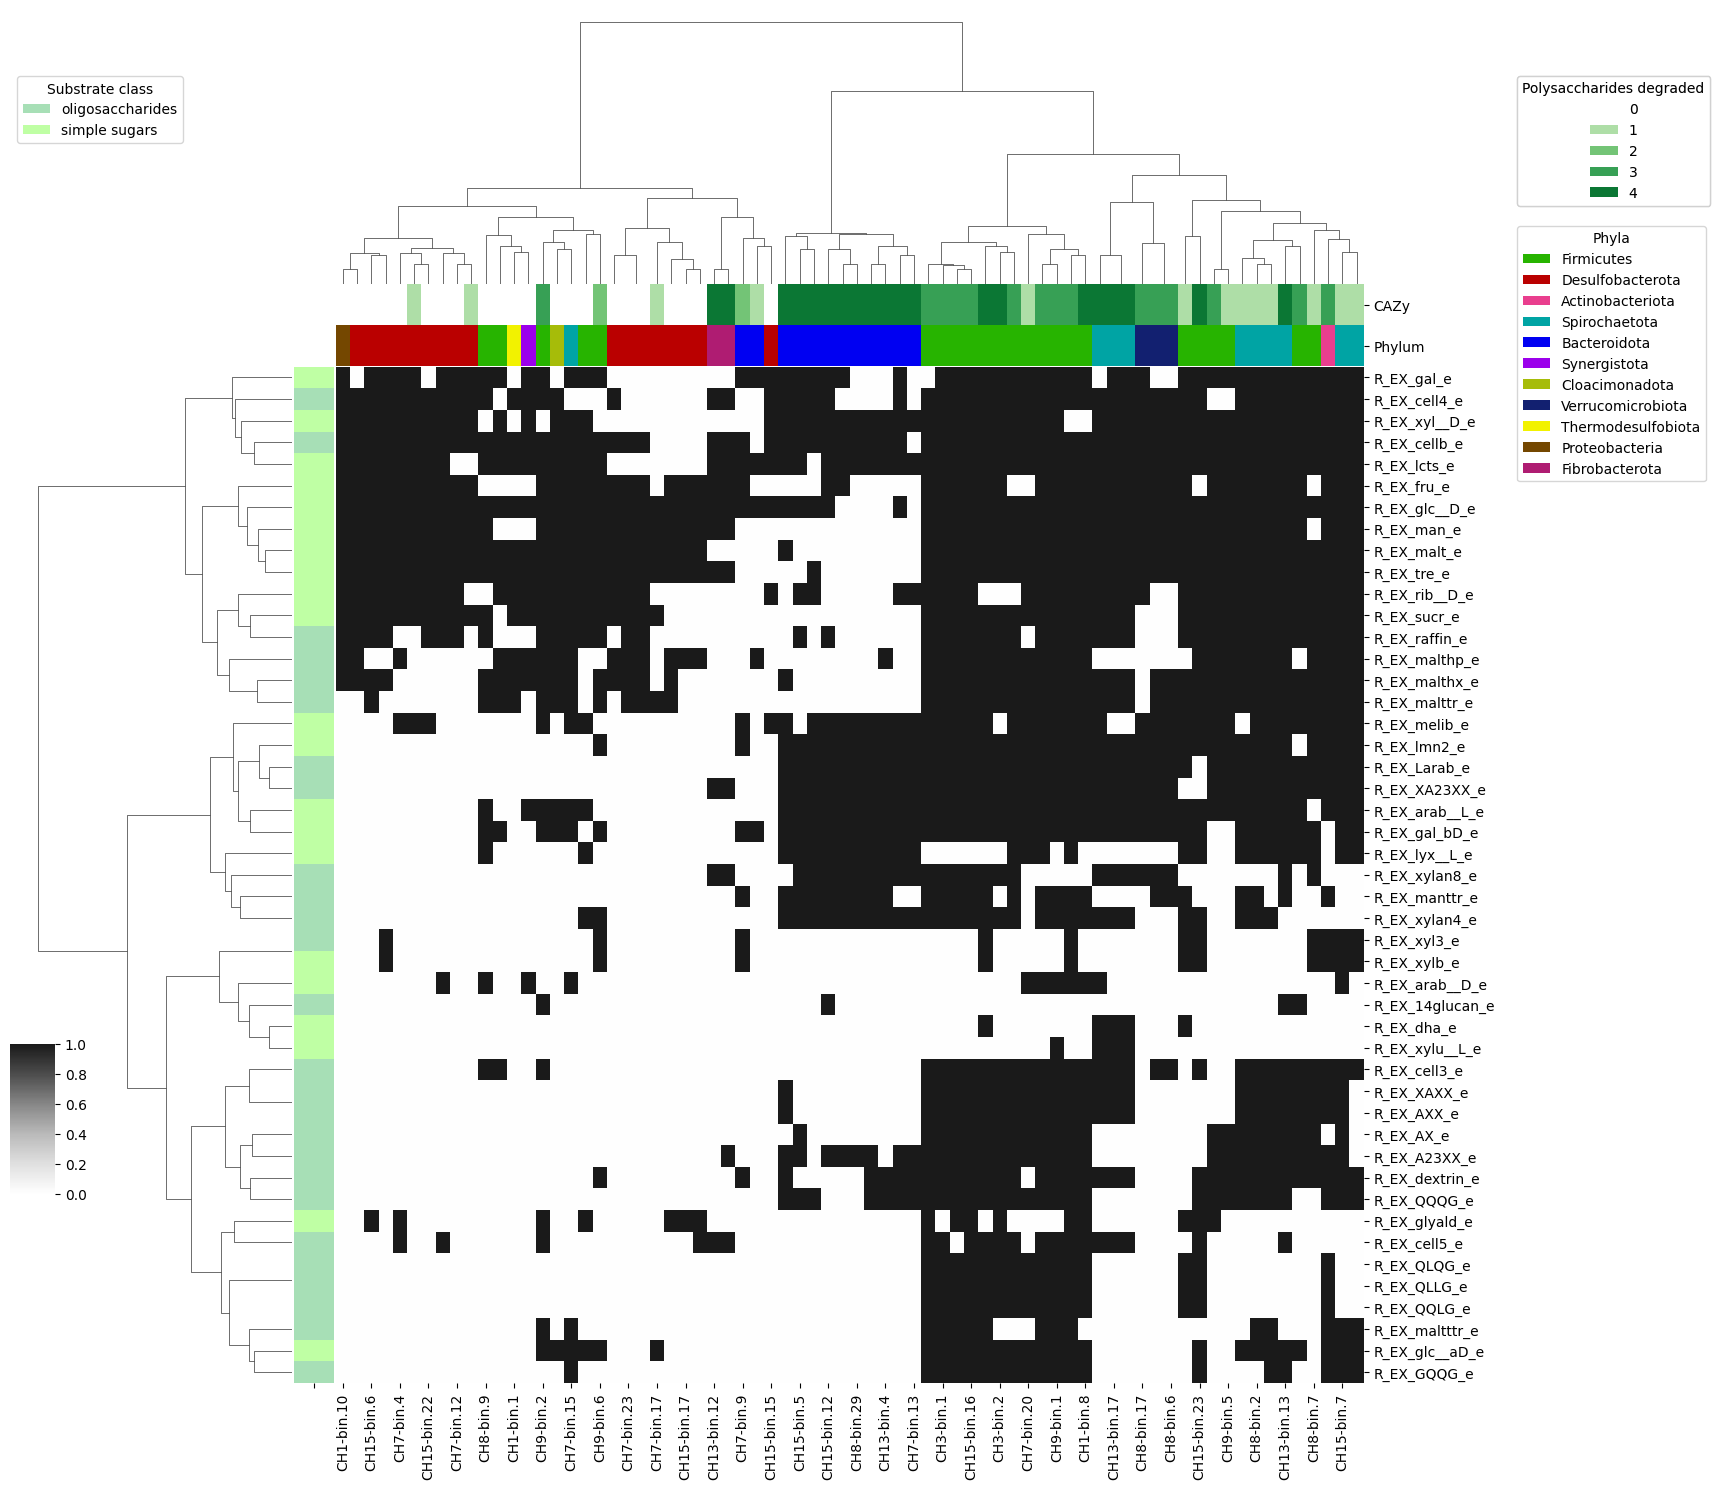

In [13]:
interesting_super_classes = ["oligosaccharides","simple sugars"]
plot_clustermap(GEMs_consumers_df,interesting_super_classes=interesting_super_classes)


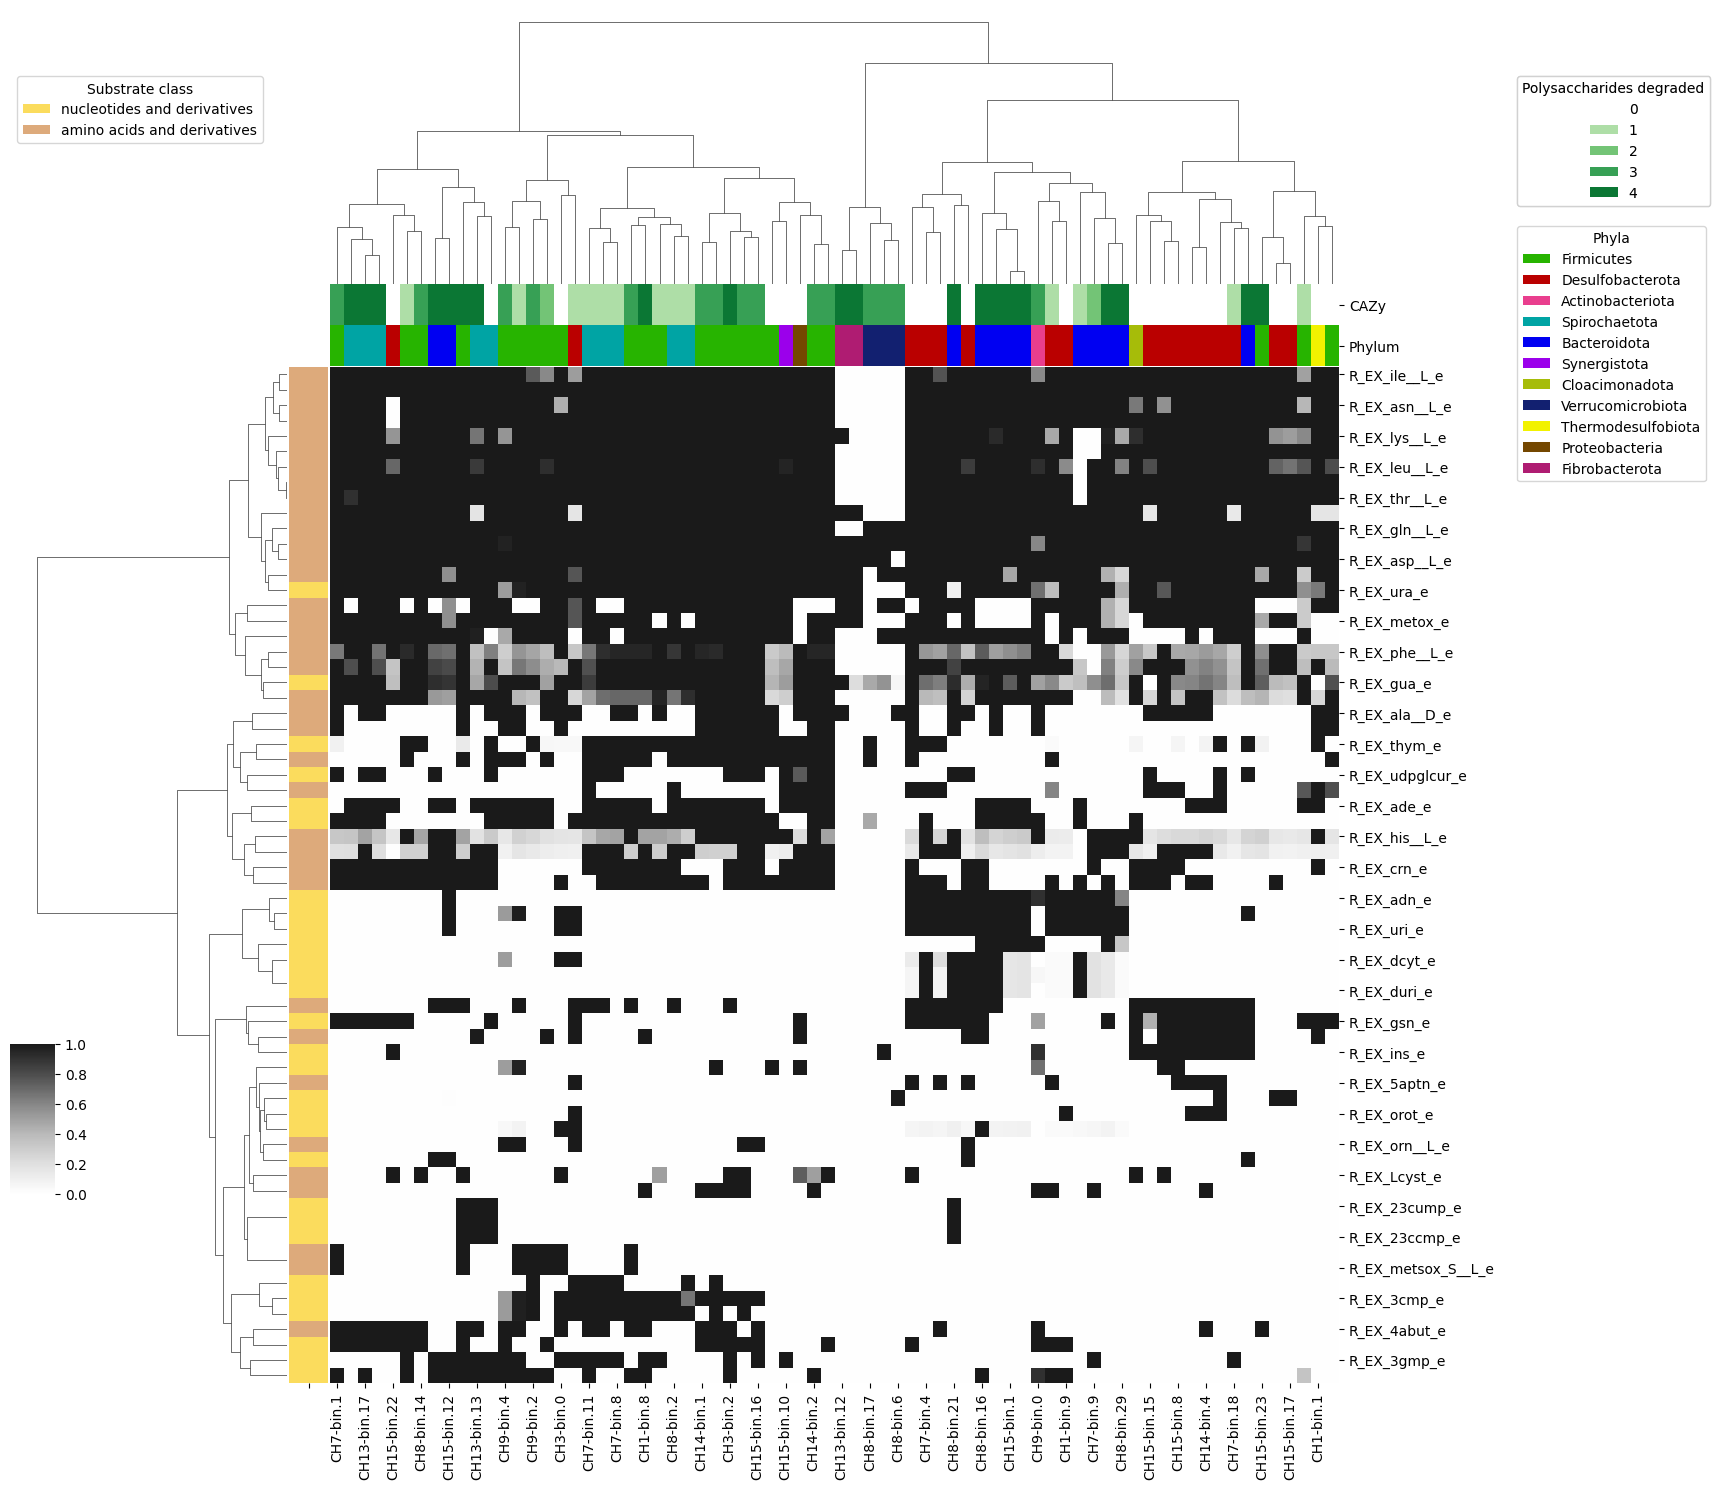

In [14]:
interesting_super_classes = ["amino acids and derivatives","nucleotides and derivatives"]
plot_clustermap(GEMs_consumers_df,interesting_super_classes=interesting_super_classes)


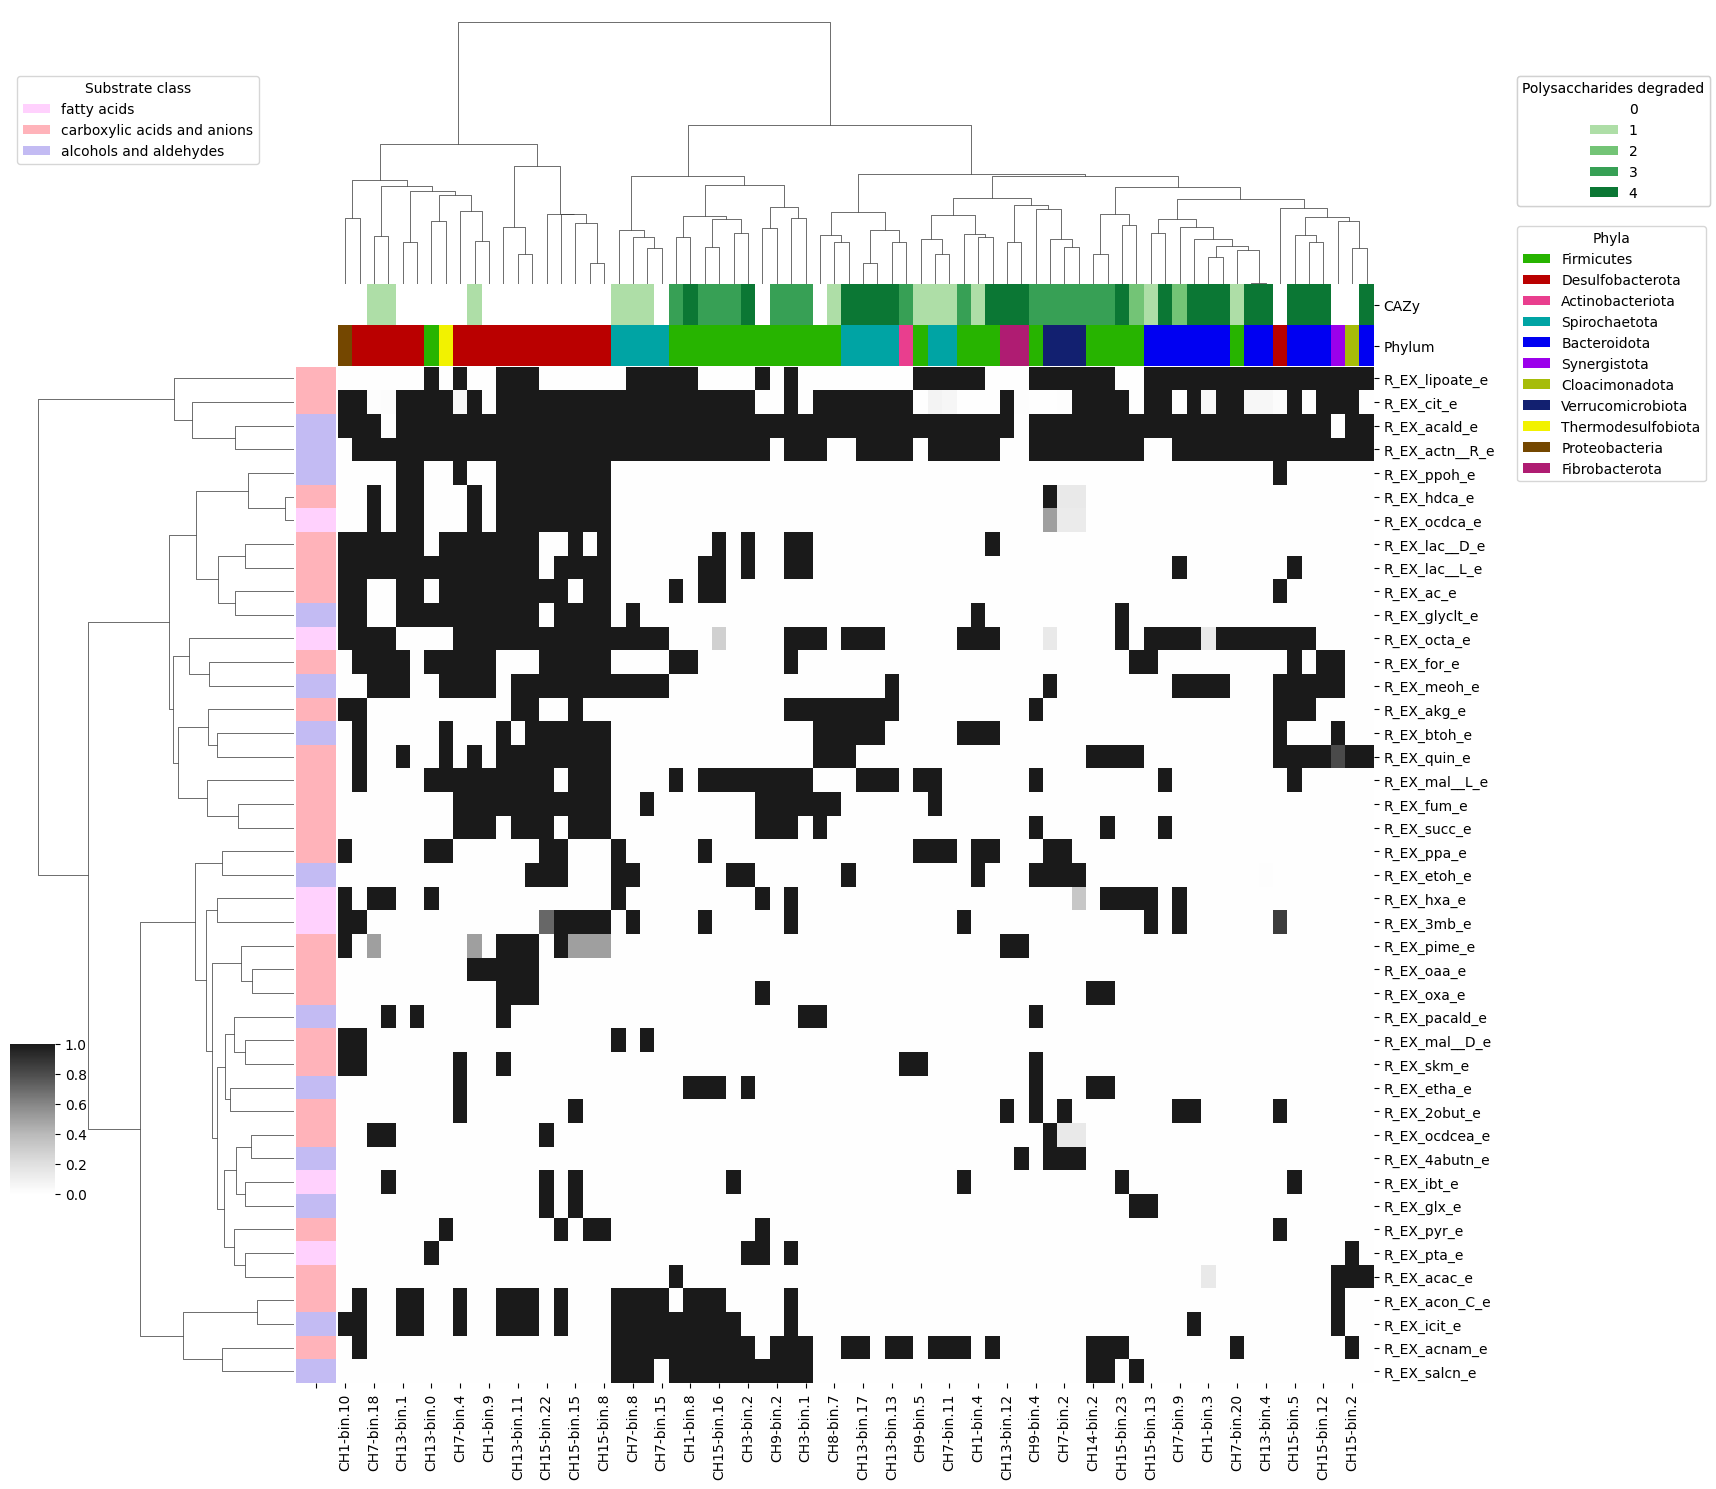

In [27]:
interesting_super_classes = ["carboxylic acids and anions","alcohols and aldehydes","fatty acids"]
plot_clustermap(GEMs_consumers_df,interesting_super_classes=interesting_super_classes)


## Producers

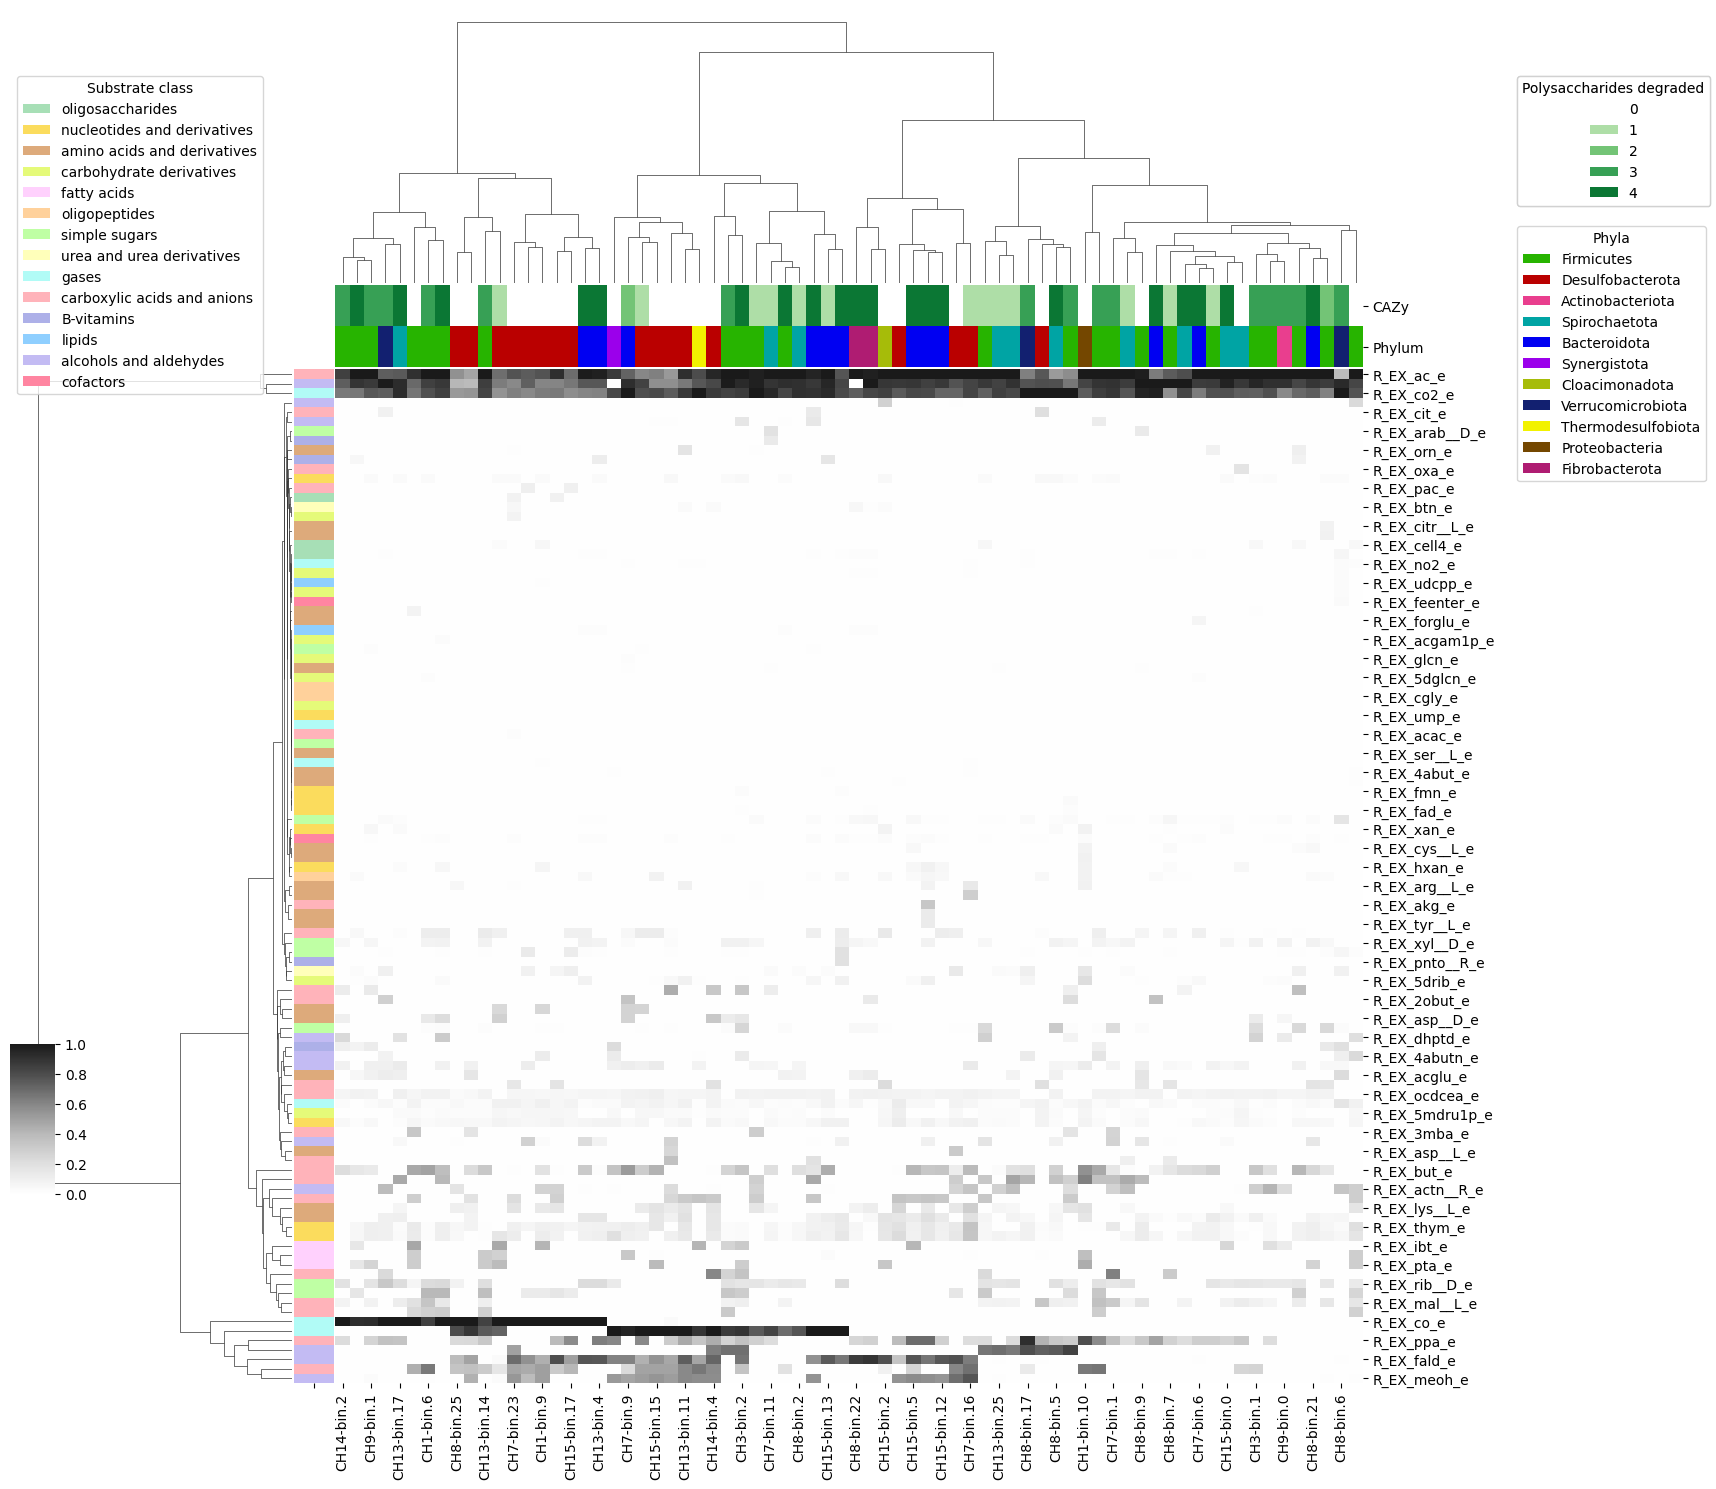

In [16]:
plot_clustermap(GEMs_producers_df)

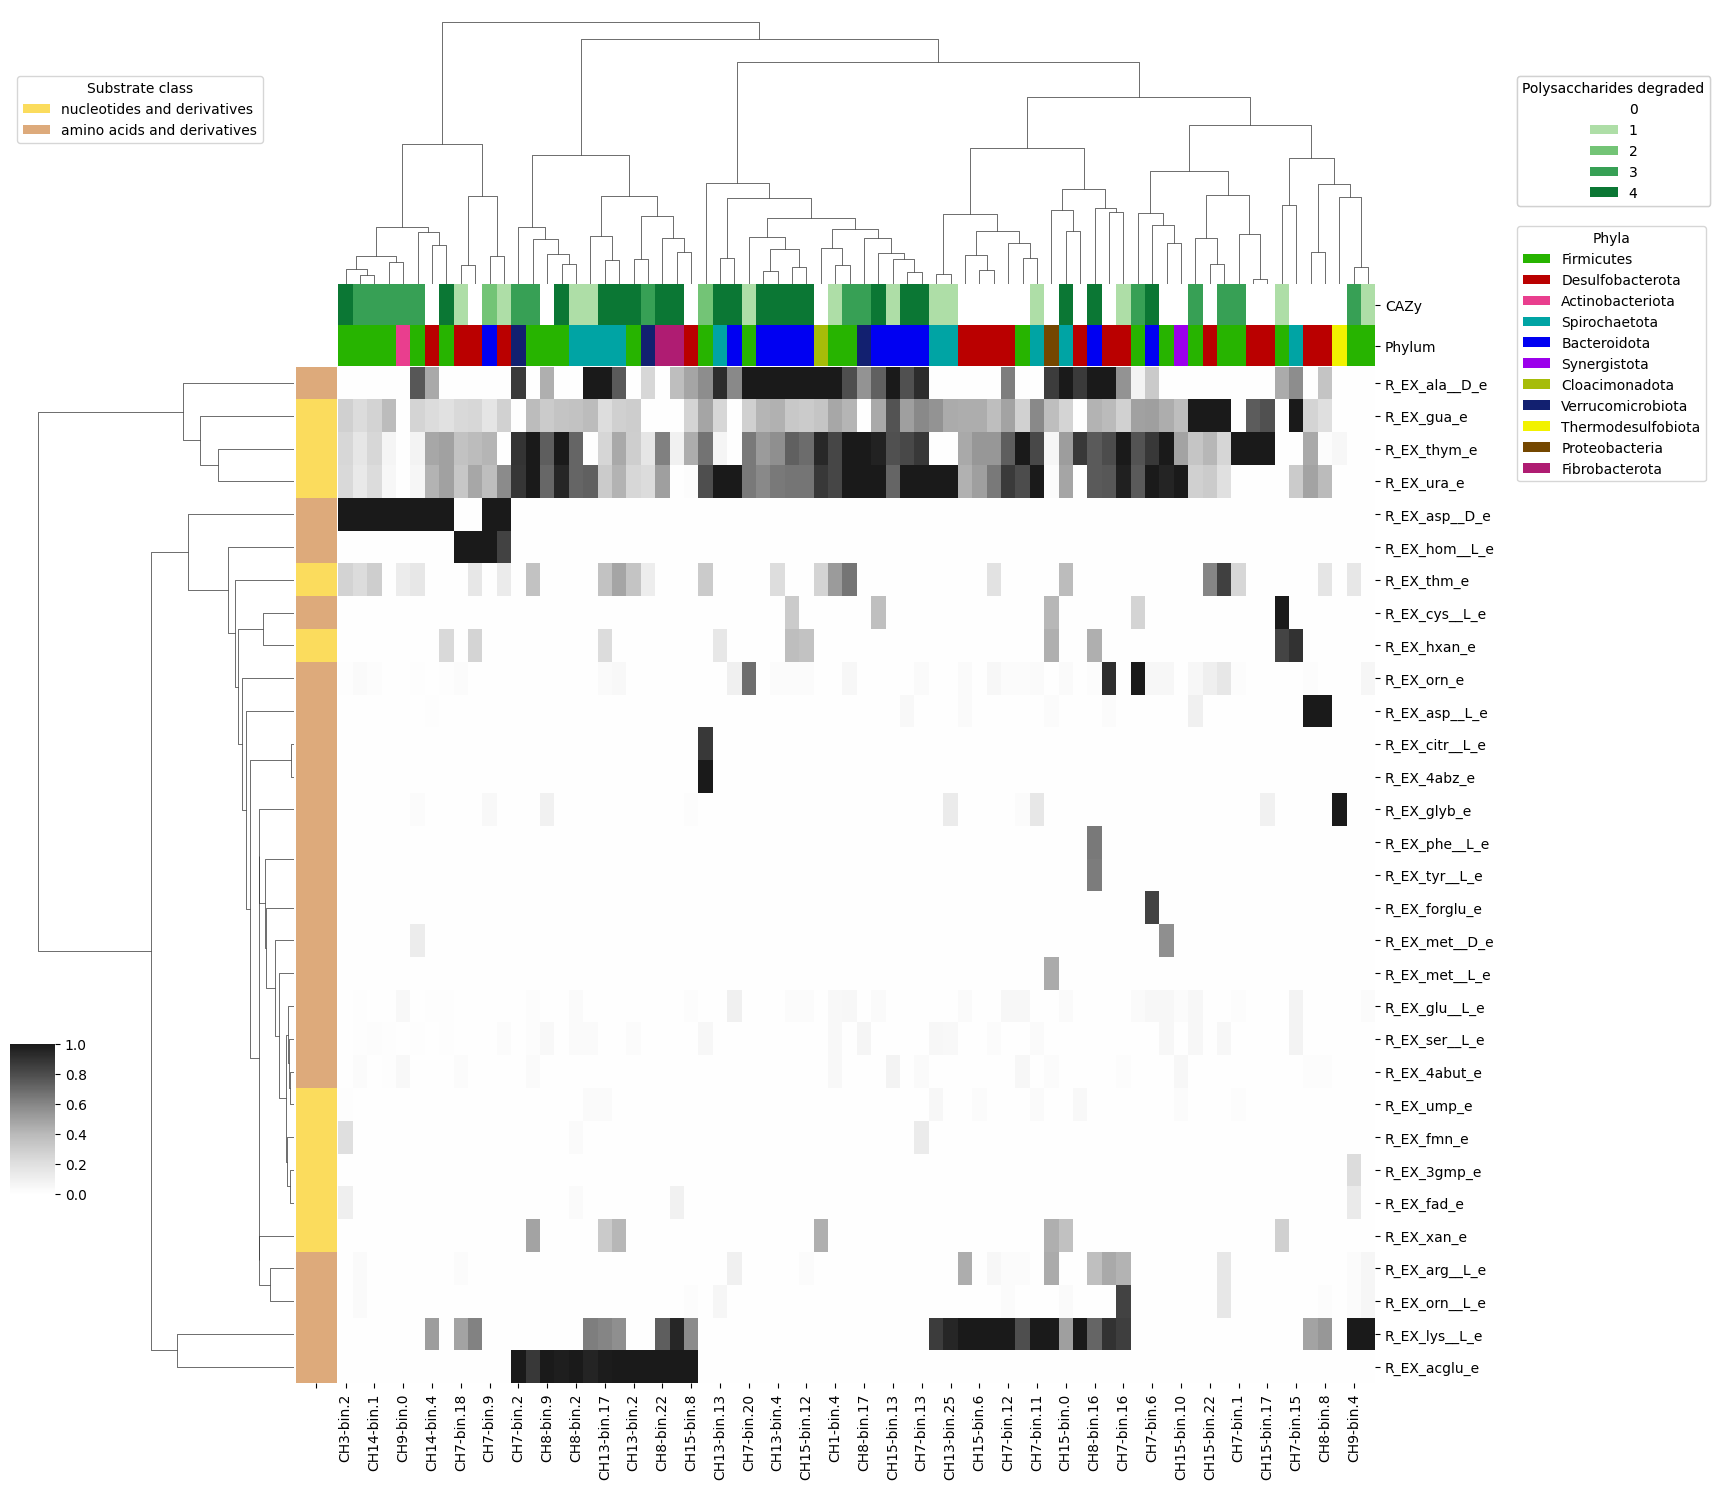

In [17]:
interesting_super_classes = ["amino acids and derivatives","nucleotides and derivatives","B-vitamins and cofactors"]
plot_clustermap(GEMs_producers_df,interesting_super_classes=interesting_super_classes)

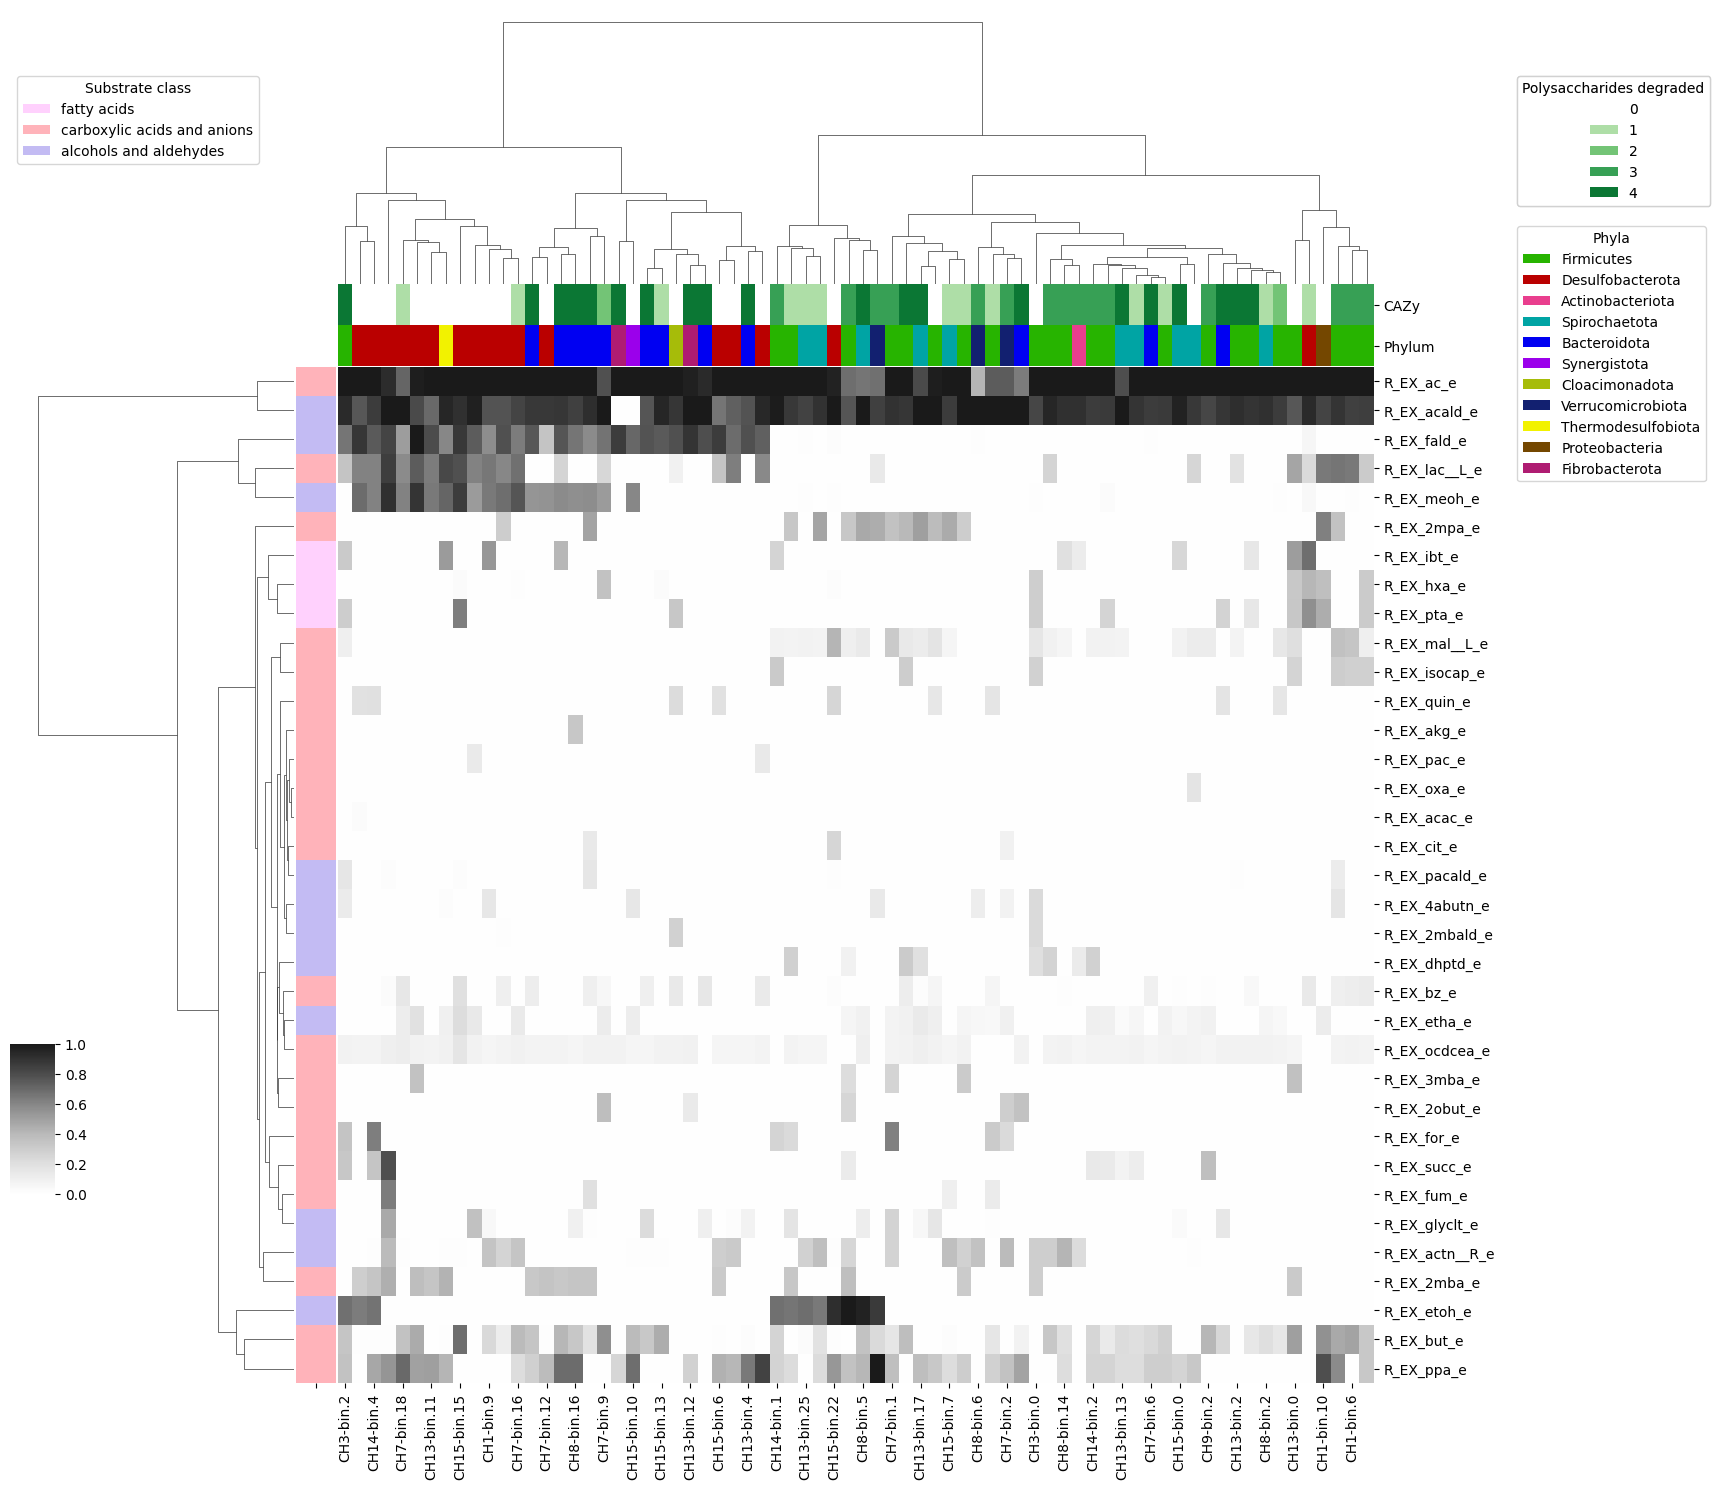

In [18]:
interesting_super_classes = ["carboxylic acids and anions","alcohols and aldehydes","fatty acids"]
plot_clustermap(GEMs_producers_df,interesting_super_classes=interesting_super_classes)

# Substrate specific

## Avicel

In [19]:
all_mags = general_func.read_allmags_data()

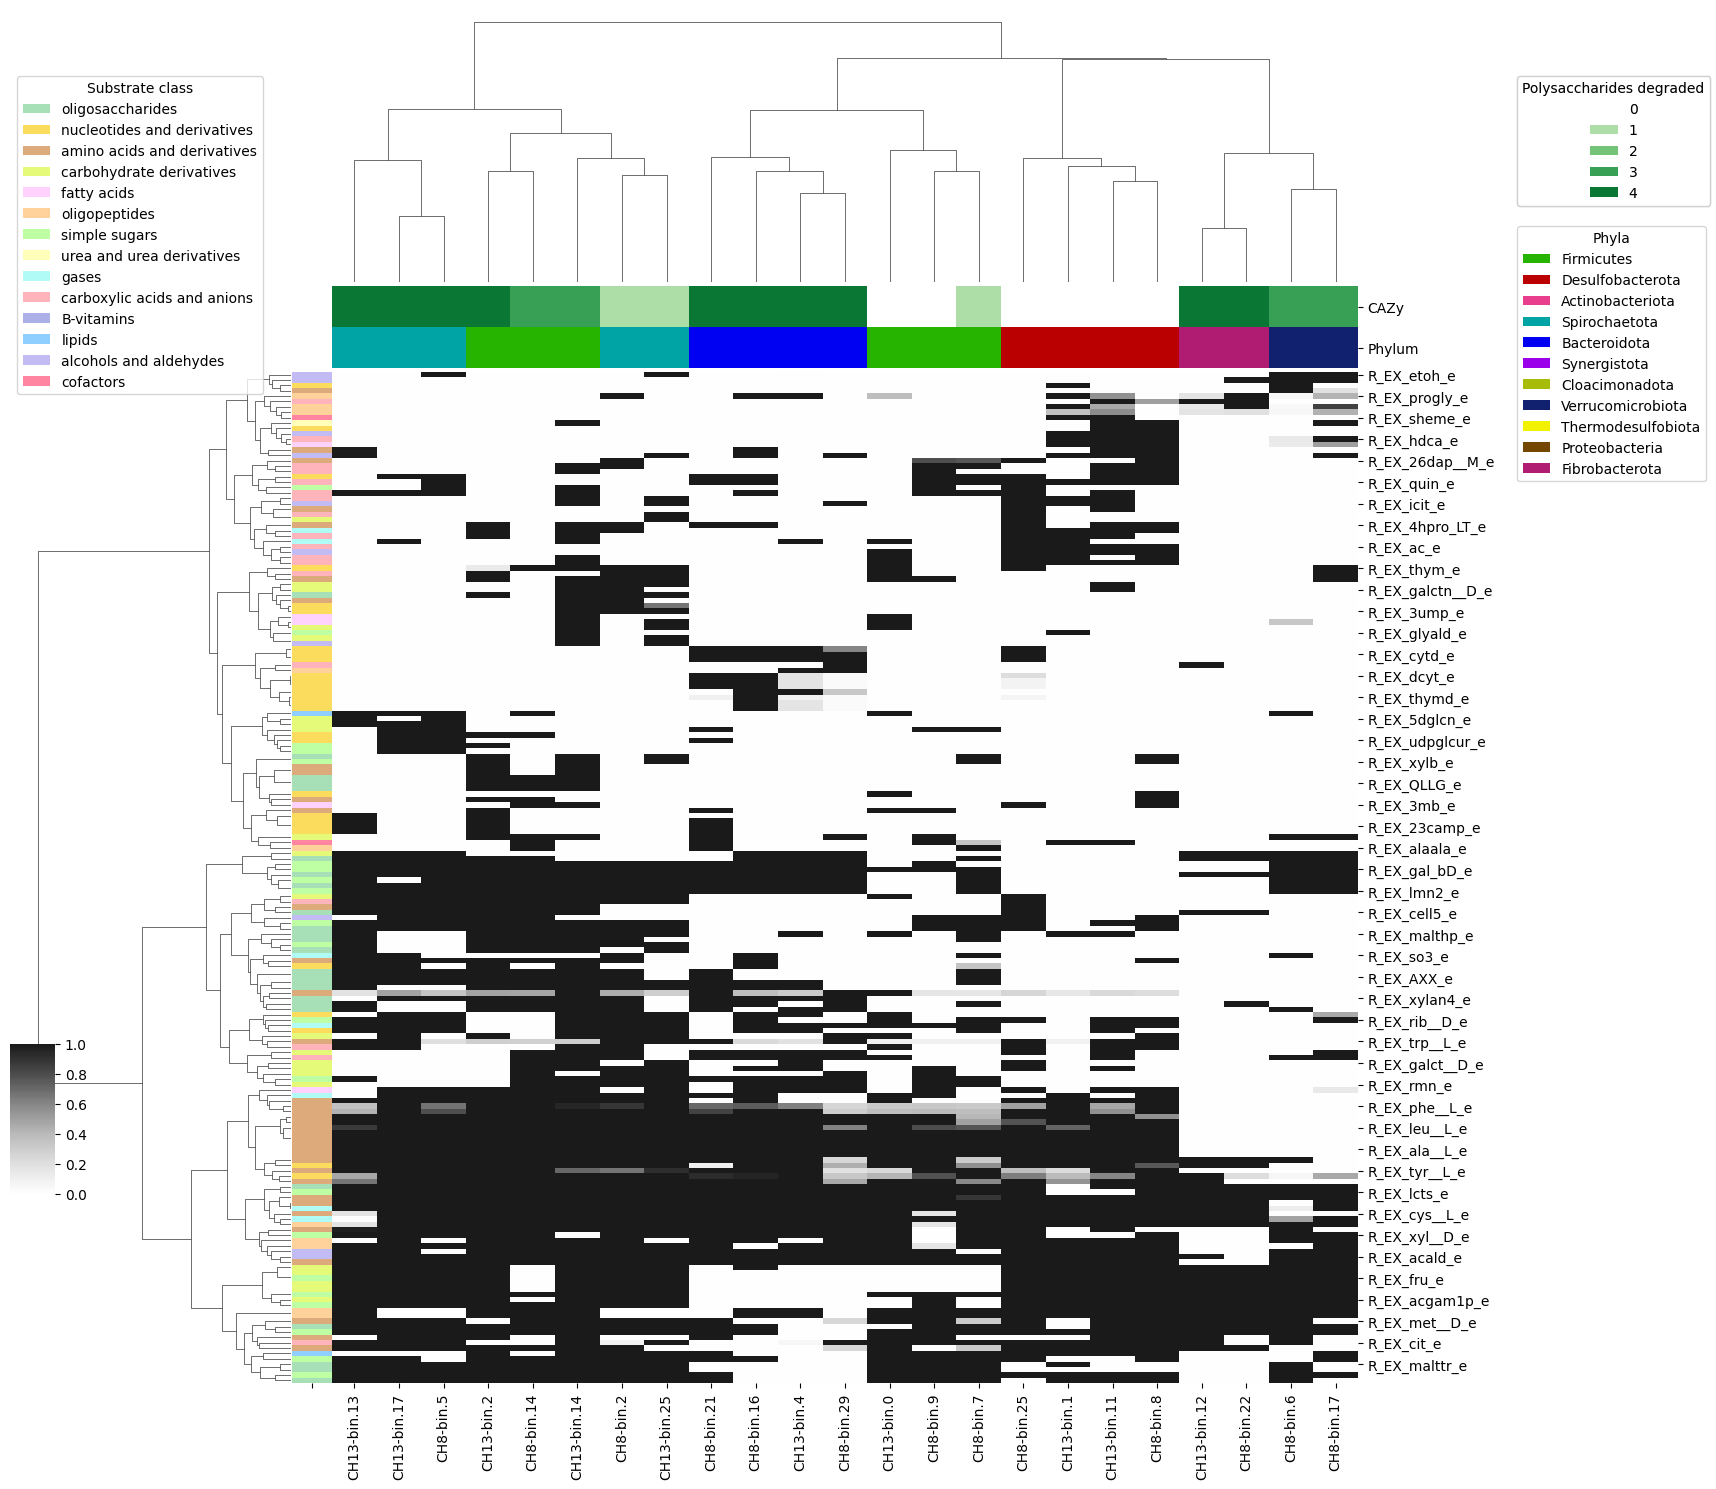

In [20]:

plot_clustermap(GEMs_consumers_df.loc[:,GEMs_consumers_df.columns.isin(all_mags[all_mags.Substrate=="Avicel"].index)])

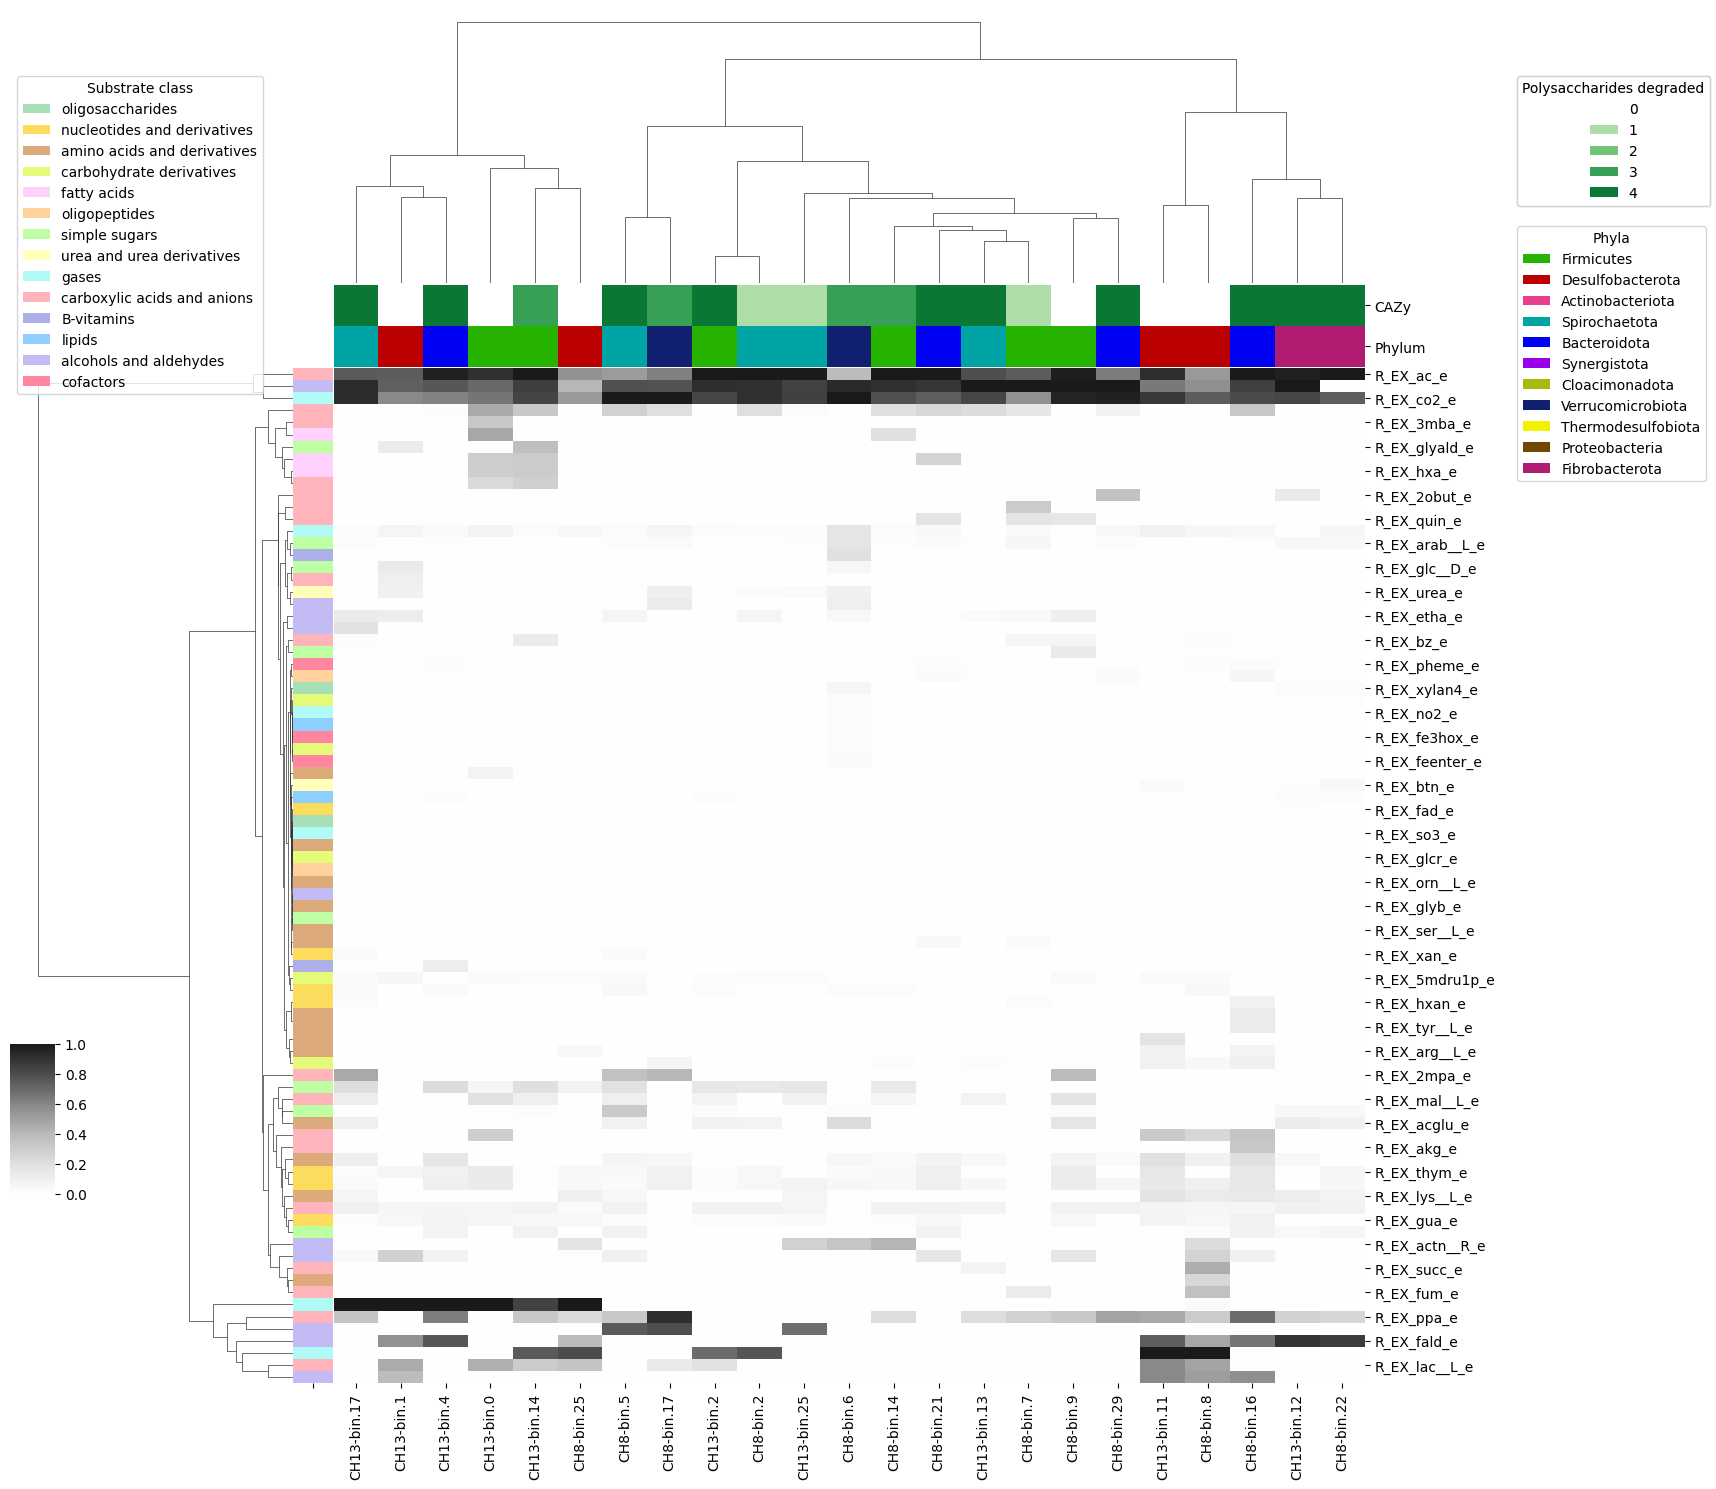

In [21]:
plot_clustermap(GEMs_producers_df.loc[:,GEMs_producers_df.columns.isin(all_mags[all_mags.Substrate=="Avicel"].index)])

## PASC

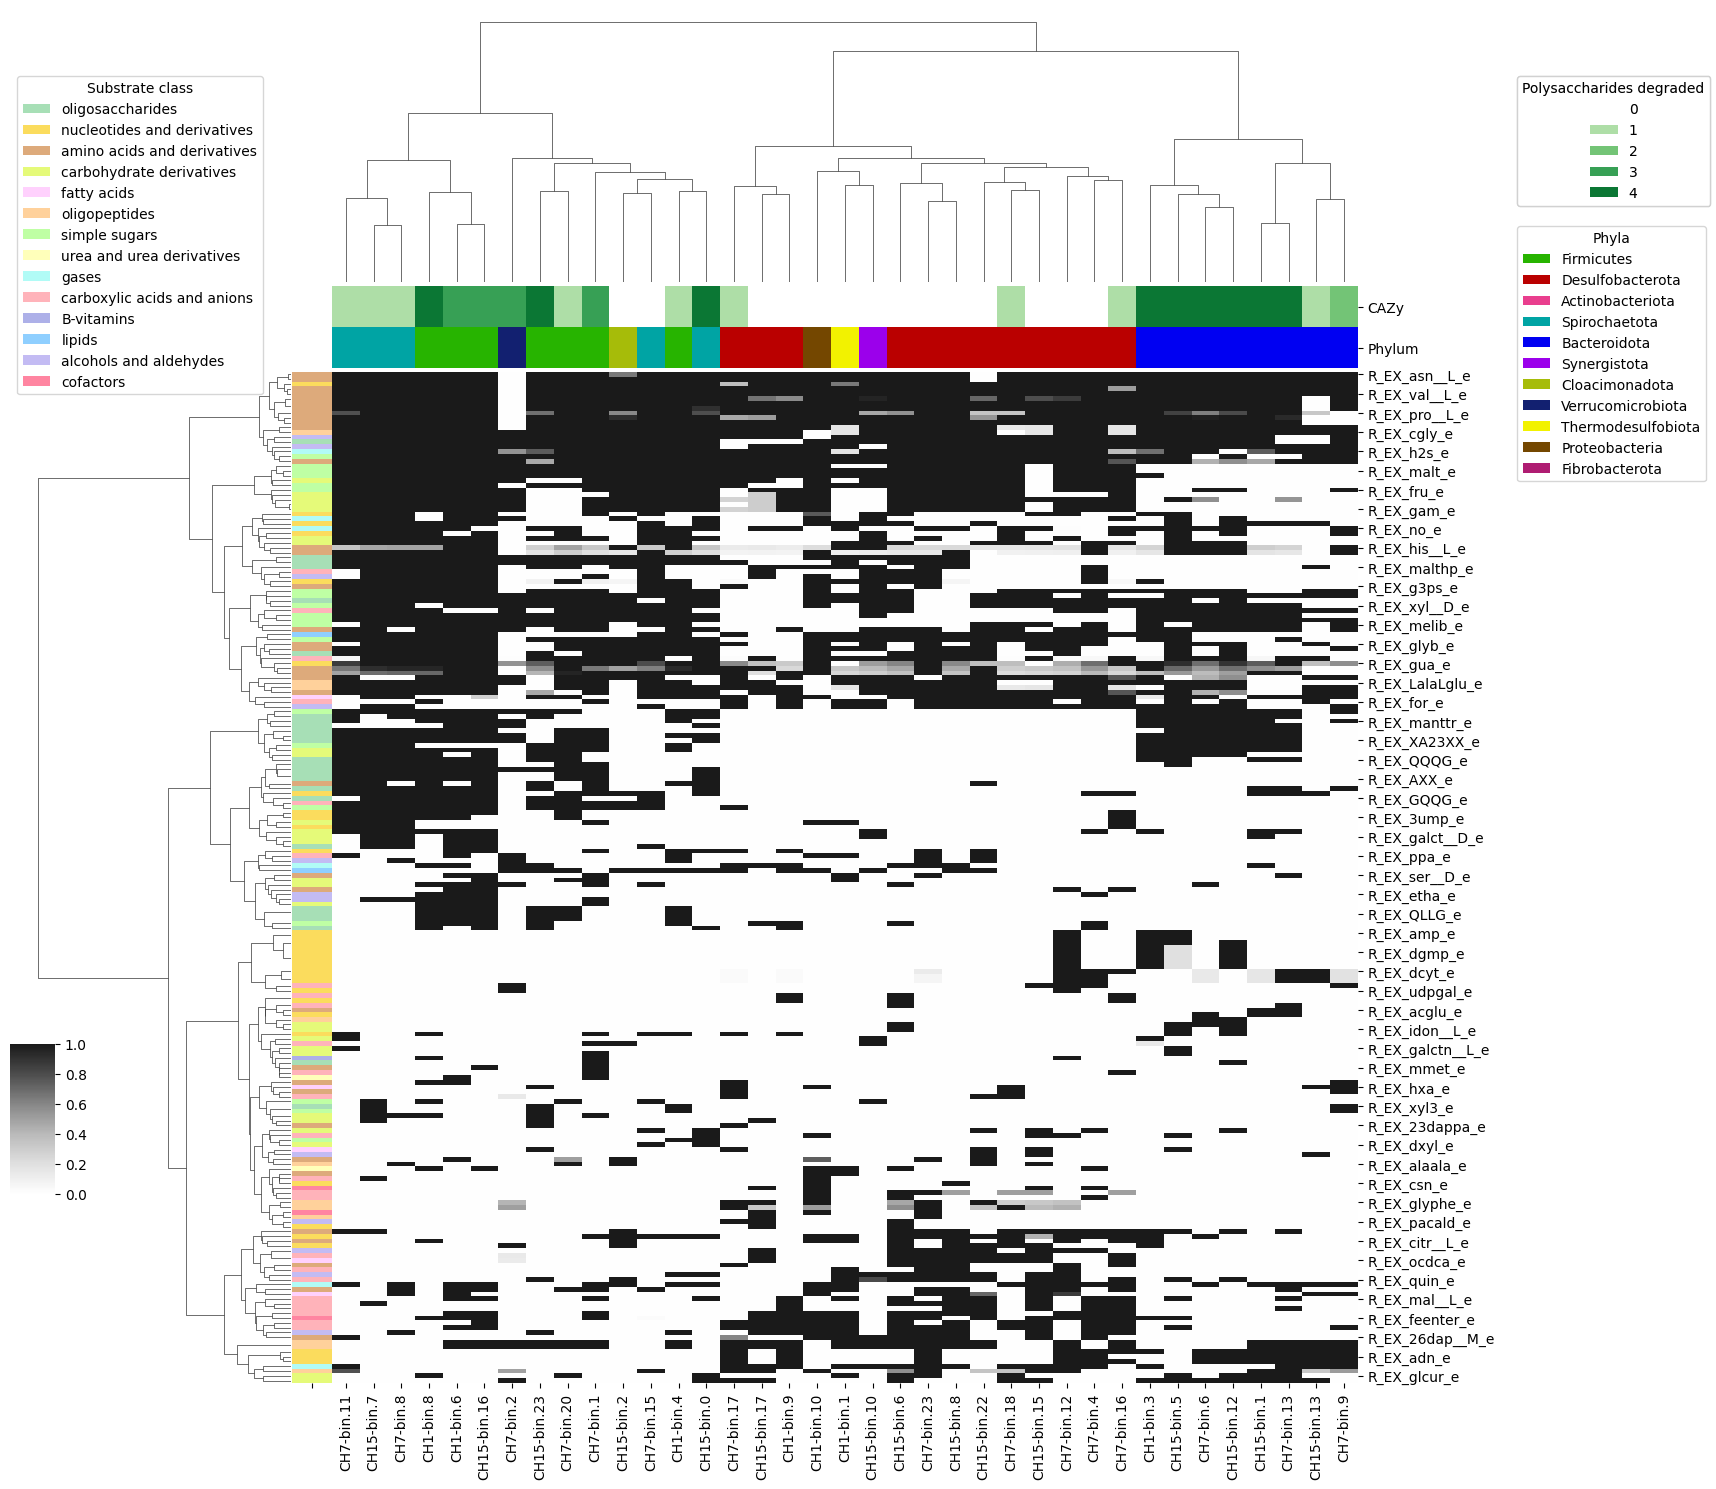

In [22]:

plot_clustermap(GEMs_consumers_df.loc[:,GEMs_consumers_df.columns.isin(all_mags[all_mags.Substrate=="PASC"].index)])

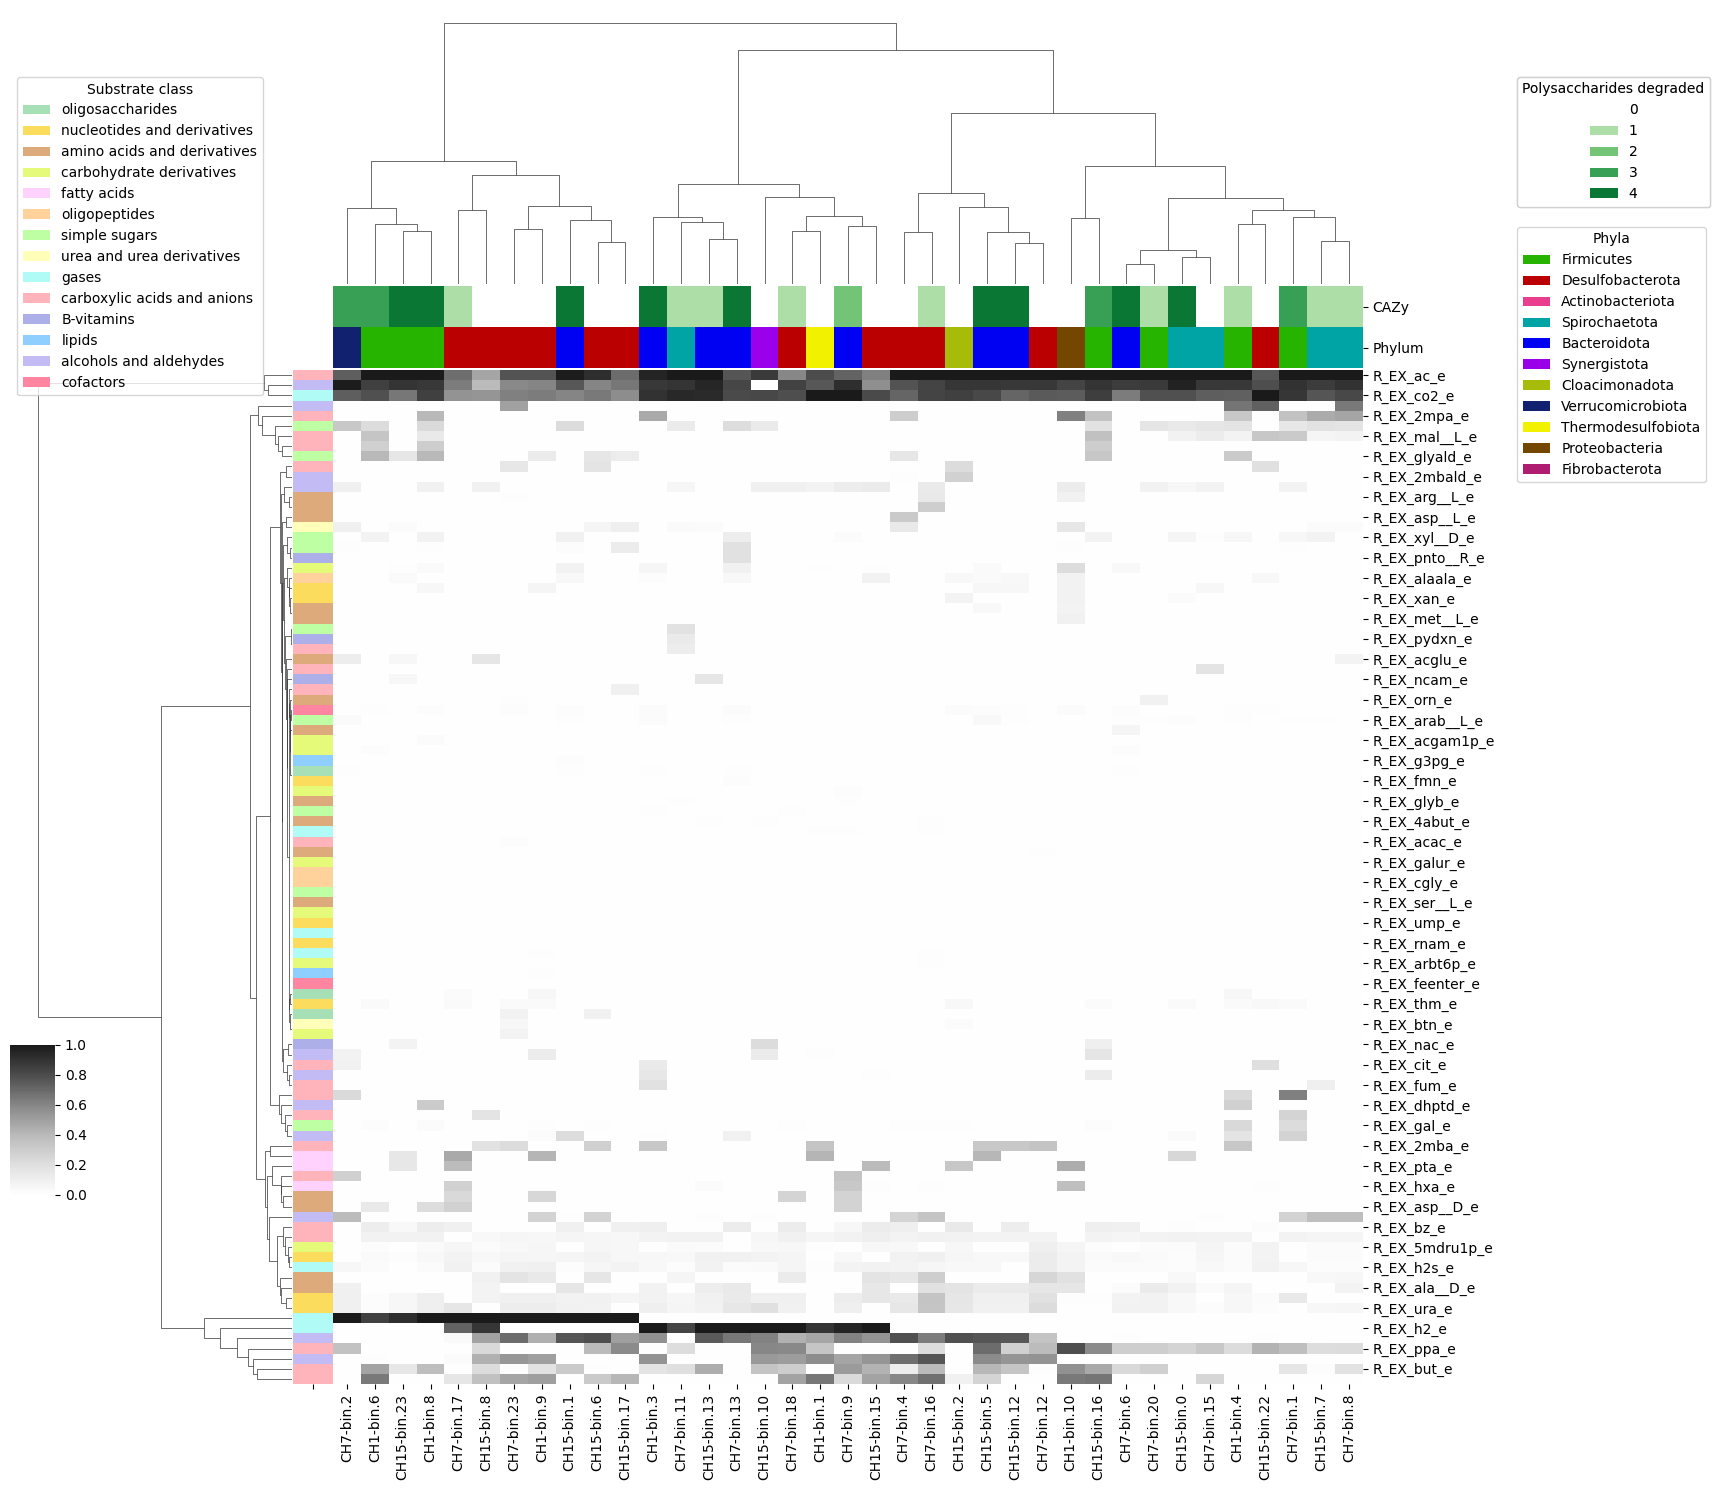

In [23]:
plot_clustermap(GEMs_producers_df.loc[:,GEMs_producers_df.columns.isin(all_mags[all_mags.Substrate=="PASC"].index)])

## Xylan

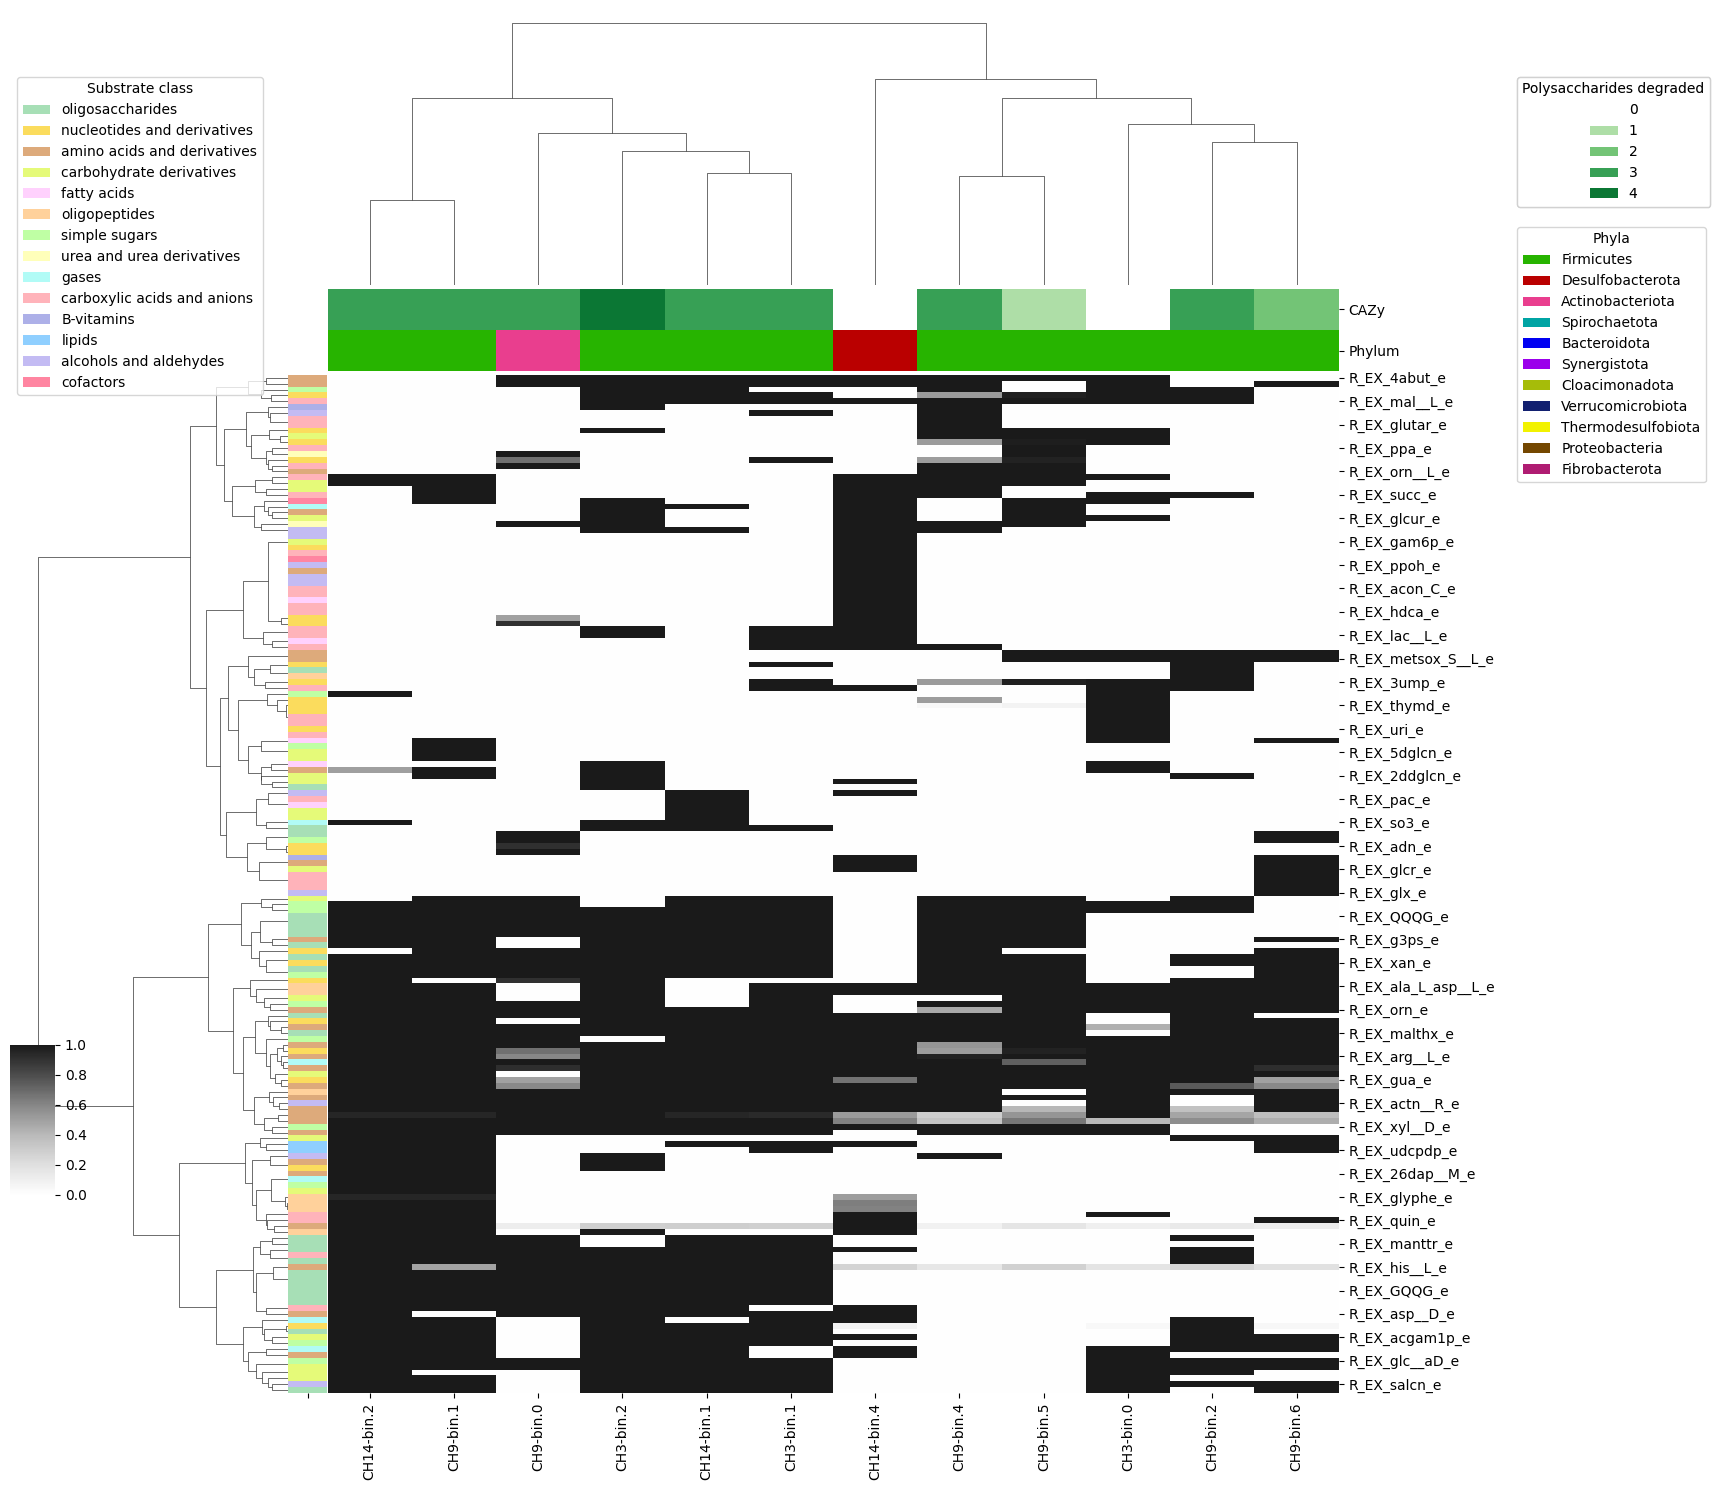

In [24]:
plot_clustermap(GEMs_consumers_df.loc[:,GEMs_consumers_df.columns.isin(all_mags[all_mags.Substrate=="Xylan"].index)])

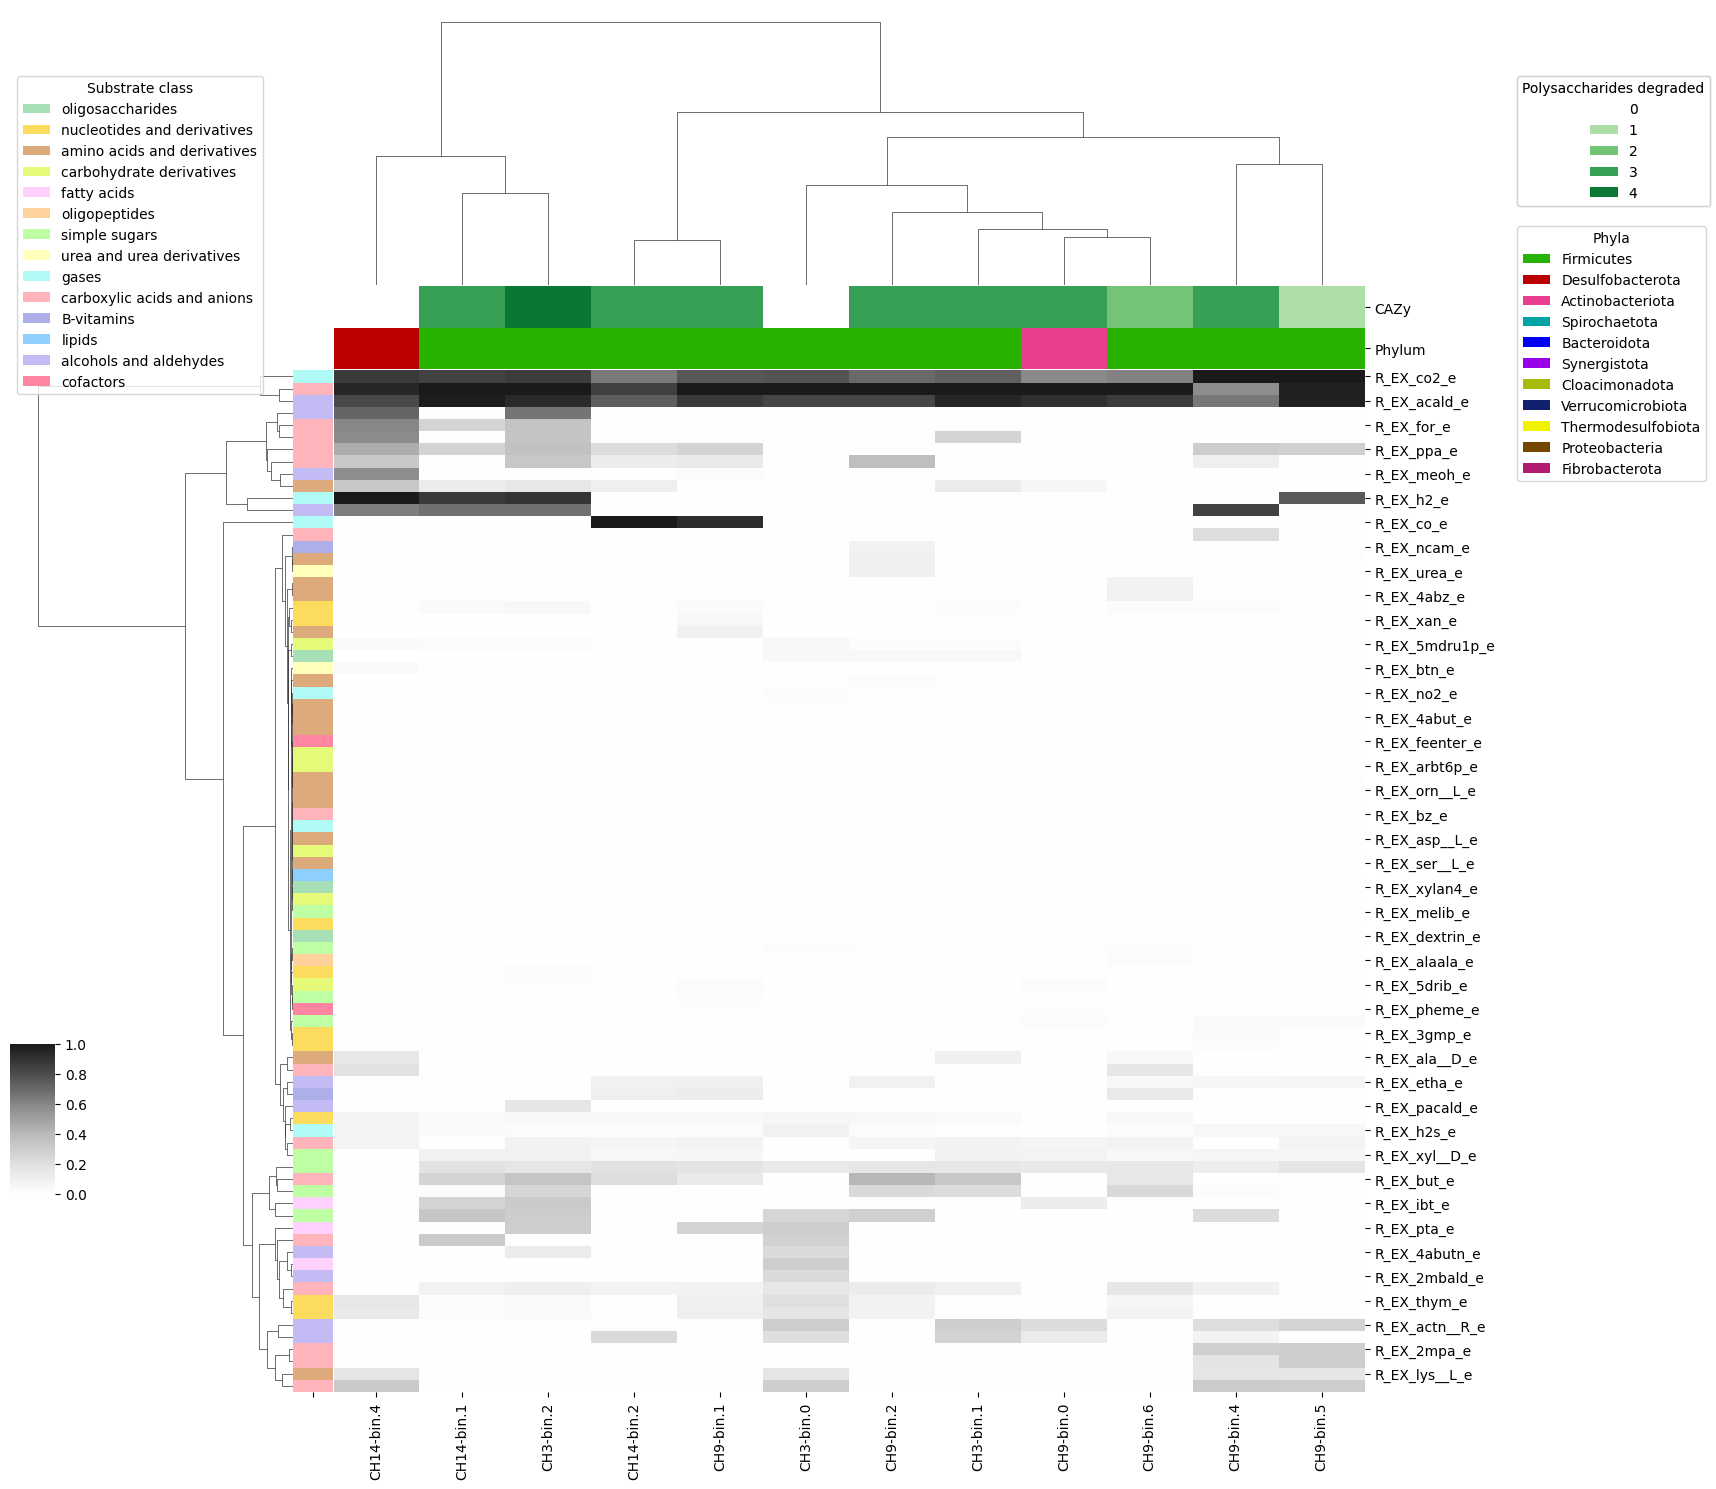

In [25]:
plot_clustermap(GEMs_producers_df.loc[:,GEMs_producers_df.columns.isin(all_mags[all_mags.Substrate=="Xylan"].index)])

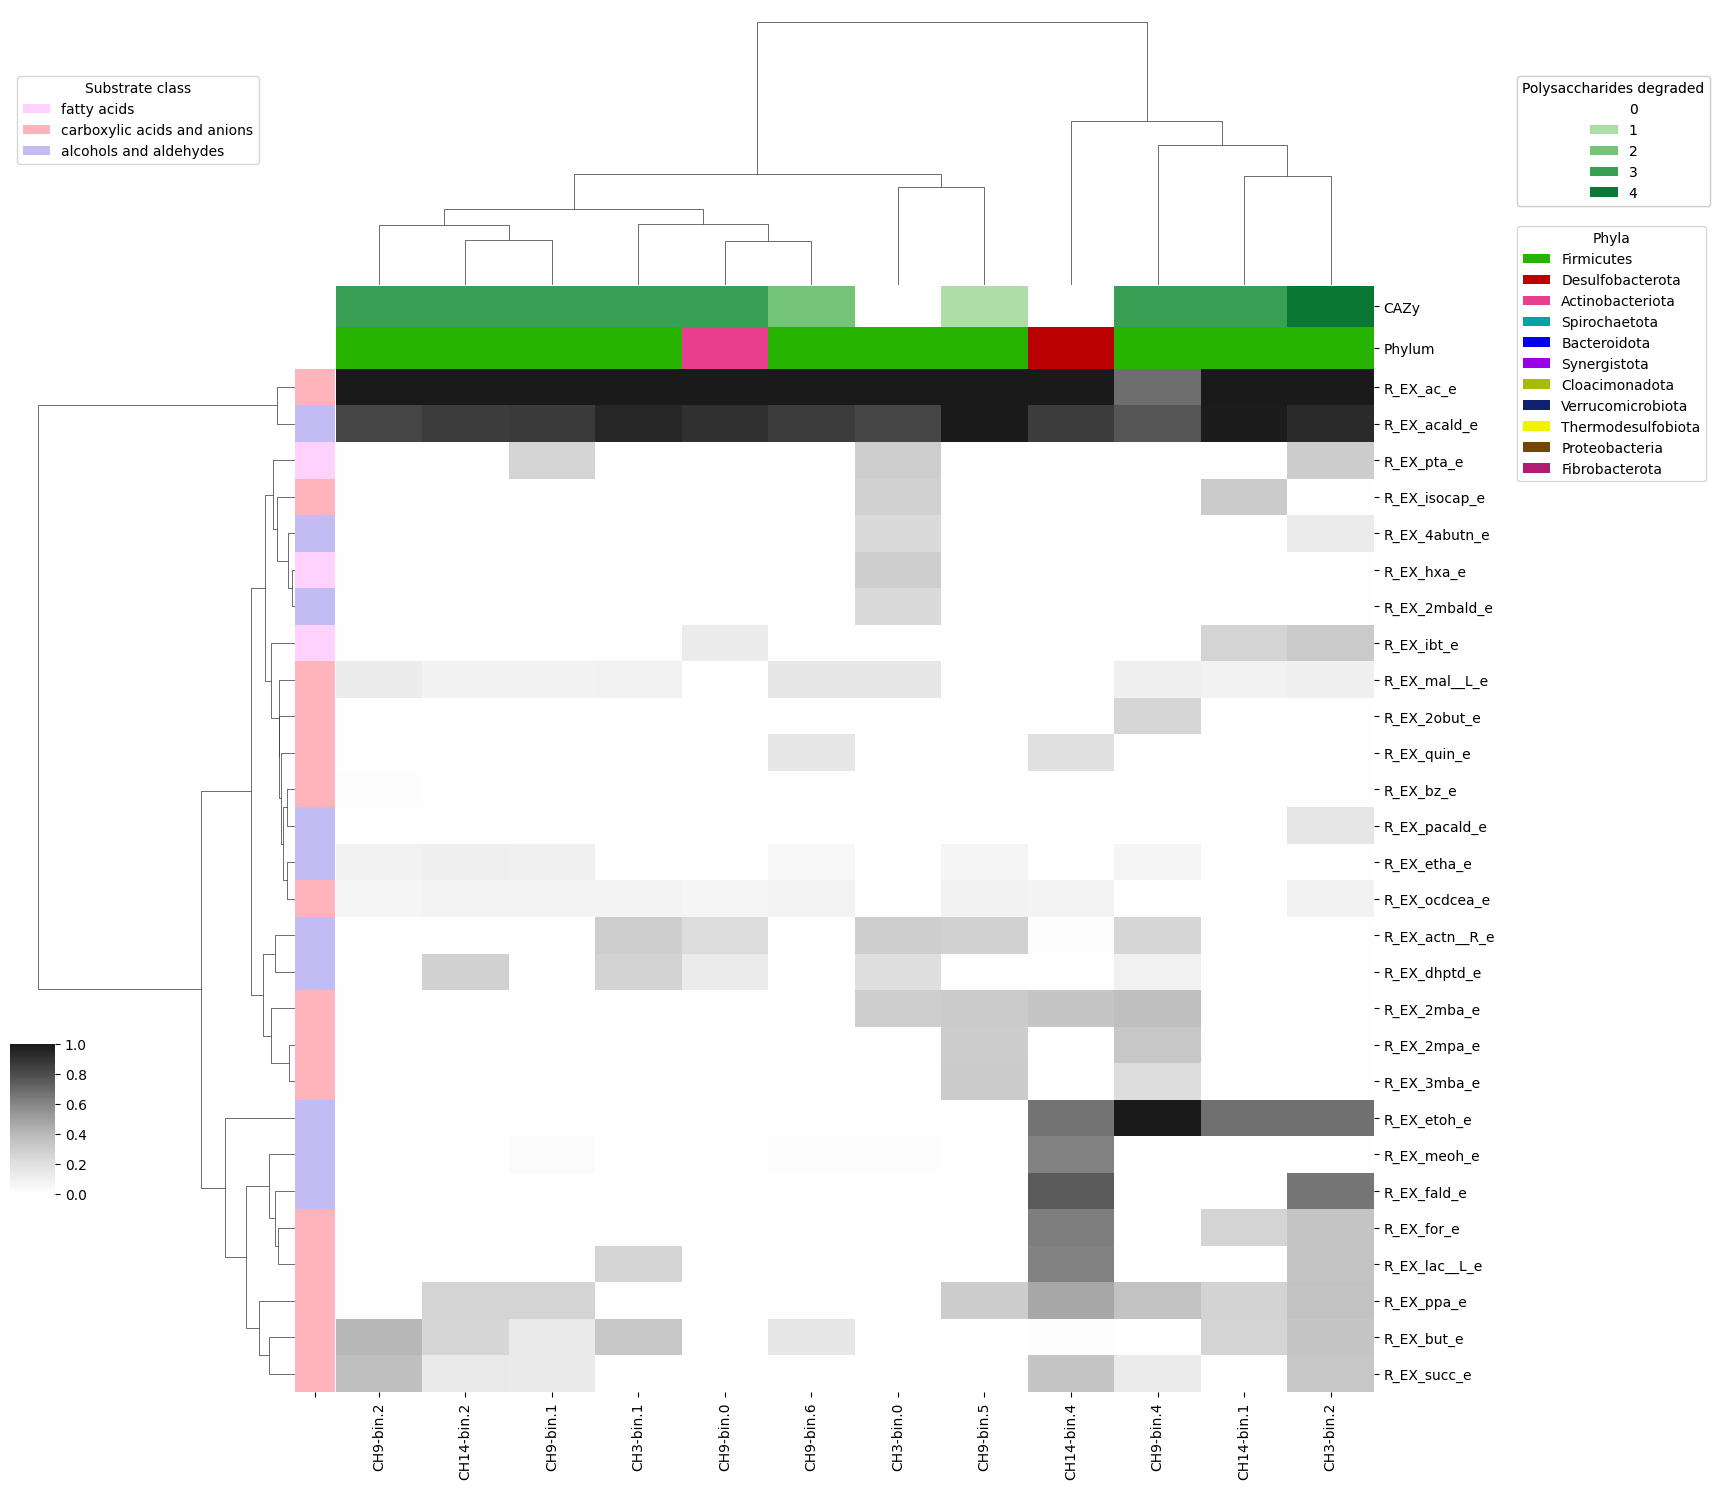

In [26]:
interesting_super_classes = ["carboxylic acids and anions","fatty acids","alcohols and aldehydes"]
plot_clustermap(GEMs_producers_df.loc[:,GEMs_producers_df.columns.isin(all_mags[all_mags.Substrate=="Xylan"].index)],
               interesting_super_classes=interesting_super_classes)
